<a href="https://colab.research.google.com/github/jijeeze/1.-E-commerce-Project/blob/main/E_commerce_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 폰트 설정 및 라이브러리

In [1]:
# 나눔 바른고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq  # 나눔 폰트 설치

# Matplotlib 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 바른고딕 폰트 경로 및 설정
fe = fm.FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe)

# Matplotlib에 폰트 적용
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 방지



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib as mat
print(mat.rcParams['font.family'])


['NanumBarunGothic']


In [3]:
import matplotlib.font_manager as fm # 설치된 폰트 목록 확인
font_list = [font.name for font in fm.fontManager.ttflist]
font_list


['NanumBarunGothic',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmss10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Serif Display',
 'STIXSizeTwoSym',
 'cmr10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'cmb10',
 'cmsy10',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmex10',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmmi10',
 'cmtt10',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberati

In [4]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import datetime as dt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import association_rules, apriori
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math
import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)
import matplotlib.pyplot as plt

# 1. 데이터 불러오기

In [5]:
# Google Drive에 연결
drive.mount('/content/drive')

# 파일 경로 설정
file_path_onlinesales = '/content/drive/MyDrive/content/Onlinesales_info.csv'
file_path_customer = '/content/drive/MyDrive/content/Customer_info.csv'
file_path_discount = '/content/drive/MyDrive/content/Discount_info.csv'
file_path_marketing = '/content/drive/MyDrive/content/Marketing_info.csv'
file_path_tax = '/content/drive/MyDrive/content/Tax_info.csv'

# 데이터 불러오기
onlinesales = pd.read_csv(file_path_onlinesales)
customer = pd.read_csv(file_path_customer)
discount = pd.read_csv(file_path_discount)
marketing = pd.read_csv(file_path_marketing)
tax = pd.read_csv(file_path_tax)

# 데이터 확인
print("Onlinesales Info (onlinesales):")
print(onlinesales.head())
print("\nCustomer Info (customer):")
print(customer.head())
print("\nDiscount Info (discount):")
print(discount.head())
print("\nMarketing Info (marketing):")
print(marketing.head())
print("\nTax Info (tax):")
print(tax.head())

Mounted at /content/drive
Onlinesales Info (onlinesales):
        고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태  
0  153.71  6.5      Used  
1  153.71  6.5      Used  
2    2.05  6.5      Used  
3   17.53  6.5  Not Used  
4   16.50  6.5      Used  

Customer Info (customer):
        고객ID 성별        고객지역  가입기간
0  USER_1358  남     Chicago    12
1  USER_0190  남  California    43
2  USER_0066  남     Chicago    33
3  USER_0345  여  California    30
4  USER_0683  남  California    49

Discount Info (discount):
     월    제품카테고리    쿠폰코드  할인율
0  Jan   Apparel  SALE10   10
1  Feb   Apparel 

# 2. EDA

## 2.1 기본 정보 확인

In [6]:
# 각 데이터프레임의 기본 정보 확인
print("Onlinesales Info (onlinesales):")
print(onlinesales.info())
print(onlinesales.describe())
print("\nCustomer Info (customer):")
print(customer.info())
print(customer.describe())
print("\nDiscount Info (discount):")
print(discount.info())
print(discount.describe())
print("\nMarketing Info (marketing):")
print(marketing.info())
print(marketing.describe())
print("\nTax Info (tax):")
print(tax.info())
print(tax.describe())

# 결측치 확인
print("\nOnlinesales 결측치 확인:")
print(onlinesales.isnull().sum())
print("\nCustomer 결측치 확인:")
print(customer.isnull().sum())
print("\nDiscount 결측치 확인:")
print(discount.isnull().sum())
print("\nMarketing 결측치 확인:")
print(marketing.isnull().sum())
print("\nTax 결측치 확인:")
print(tax.isnull().sum())

Onlinesales Info (onlinesales):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB
None
                 수량          평균금액           배송료
count  52924.000000  52924.000000  52924.000000
mean       4.497638     52.237646     10.517630
std       20.104711     64.006882     19.475613
min        1.000000      0.390000      0.000000
25%        1.000000      5.700000      6.000000
50%        1.000000     16.990000      6.000000
75%        2.000000    102.130000      6.500000
ma

In [7]:
# 데이터 타입 확인
print("\nOnlinesales 데이터 타입:")
print(onlinesales.dtypes)
print("\nCustomer 데이터 타입:")
print(customer.dtypes)
print("\nDiscount 데이터 타입:")
print(discount.dtypes)
print("\nMarketing 데이터 타입:")
print(marketing.dtypes)
print("\nTax 데이터 타입:")
print(tax.dtypes)

# 범주형 변수의 고유 값 확인 (예시)
print("\nOnlinesales 제품카테고리 고유 값:")
print(onlinesales['제품카테고리'].unique())
print("\nCustomer 고객지역 고유 값:")
print(customer['고객지역'].unique())


Onlinesales 데이터 타입:
고객ID       object
거래ID       object
거래날짜       object
제품ID       object
제품카테고리     object
수량          int64
평균금액      float64
배송료       float64
쿠폰상태       object
dtype: object

Customer 데이터 타입:
고객ID    object
성별      object
고객지역    object
가입기간     int64
dtype: object

Discount 데이터 타입:
월         object
제품카테고리    object
쿠폰코드      object
할인율        int64
dtype: object

Marketing 데이터 타입:
날짜         object
오프라인비용      int64
온라인비용     float64
dtype: object

Tax 데이터 타입:
제품카테고리     object
GST       float64
dtype: object

Onlinesales 제품카테고리 고유 값:
['Nest-USA' 'Office' 'Apparel' 'Bags' 'Drinkware' 'Lifestyle'
 'Notebooks & Journals' 'Headgear' 'Waze' 'Fun' 'Nest-Canada' 'Backpacks'
 'Google' 'Bottles' 'Gift Cards' 'More Bags' 'Housewares' 'Android'
 'Accessories' 'Nest']

Customer 고객지역 고유 값:
['Chicago' 'California' 'New York' 'New Jersey' 'Washington DC']


## 2.2 수치형 & 범주형 분포 확인

### 2.2.1 수치형 변수의 분포 확인

히스토그램을 통한 분포 확인:

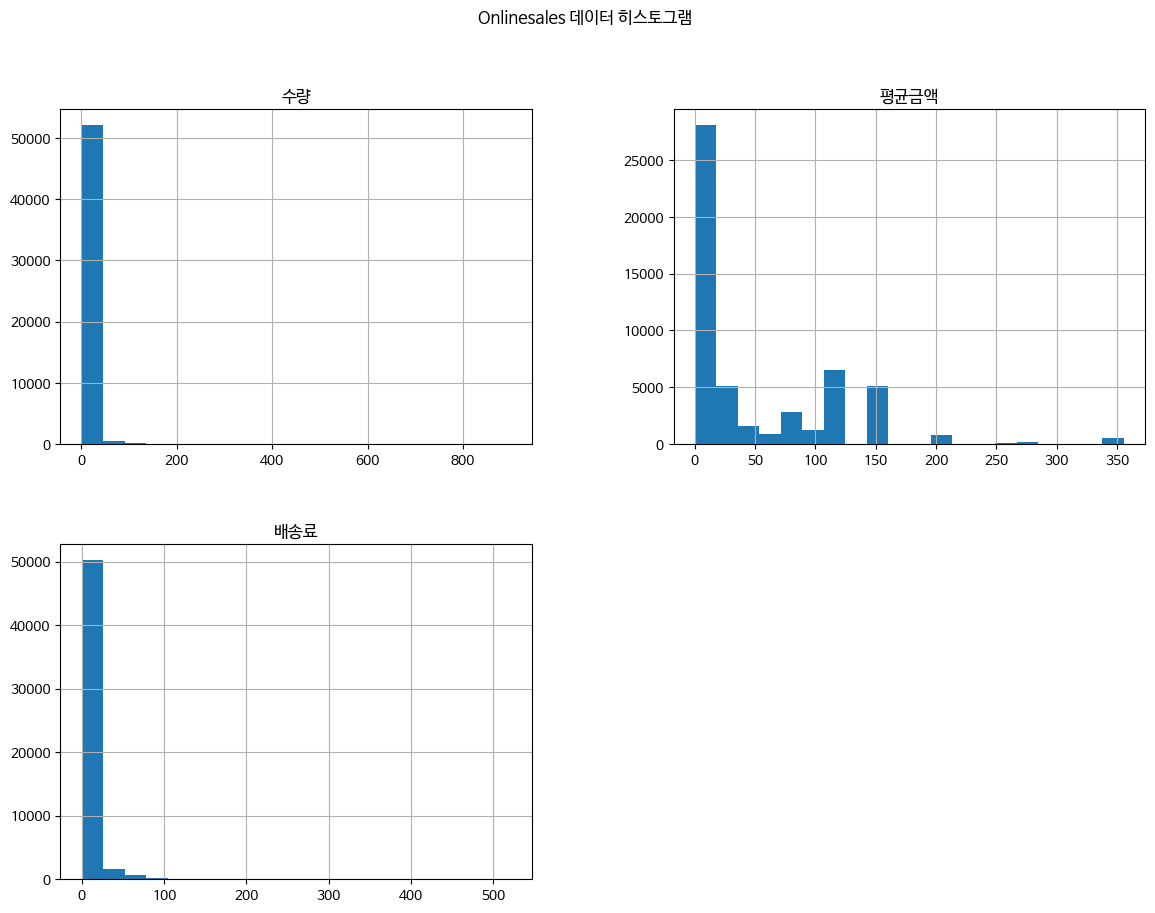

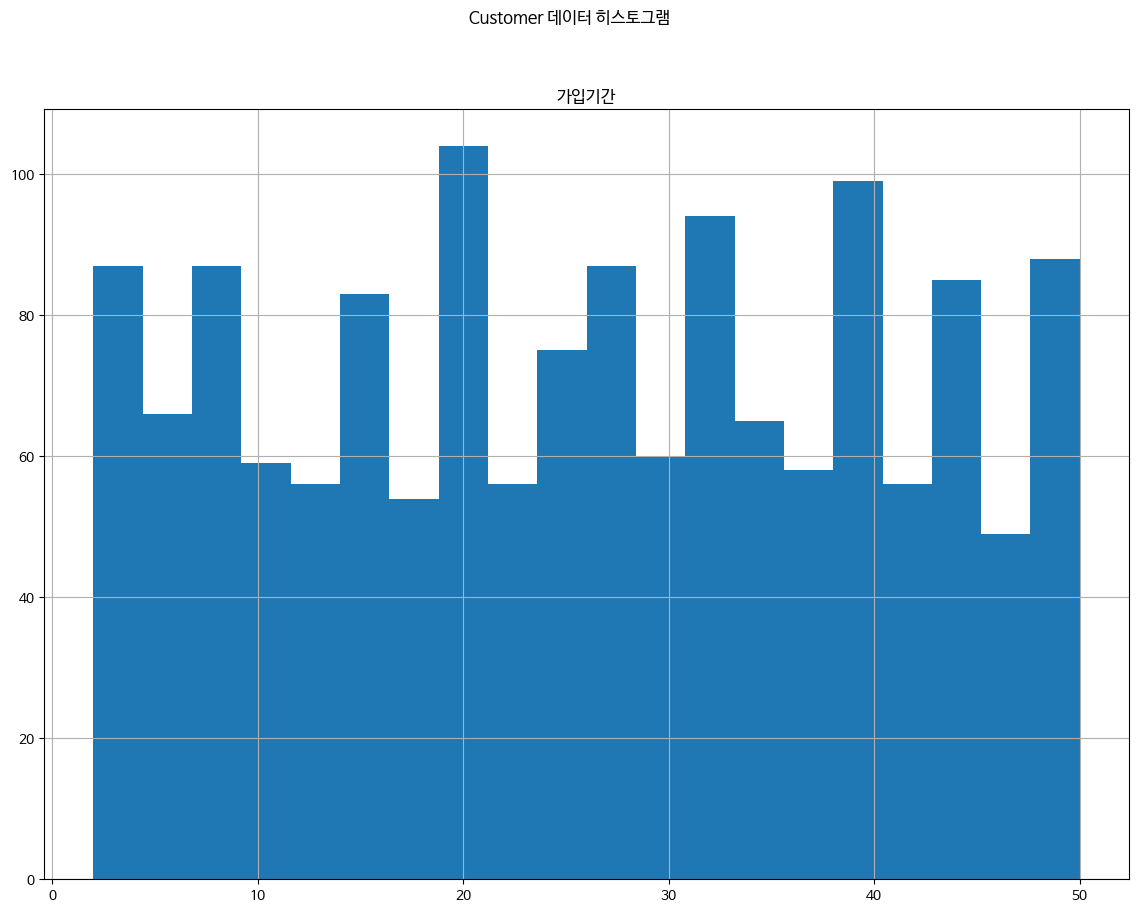

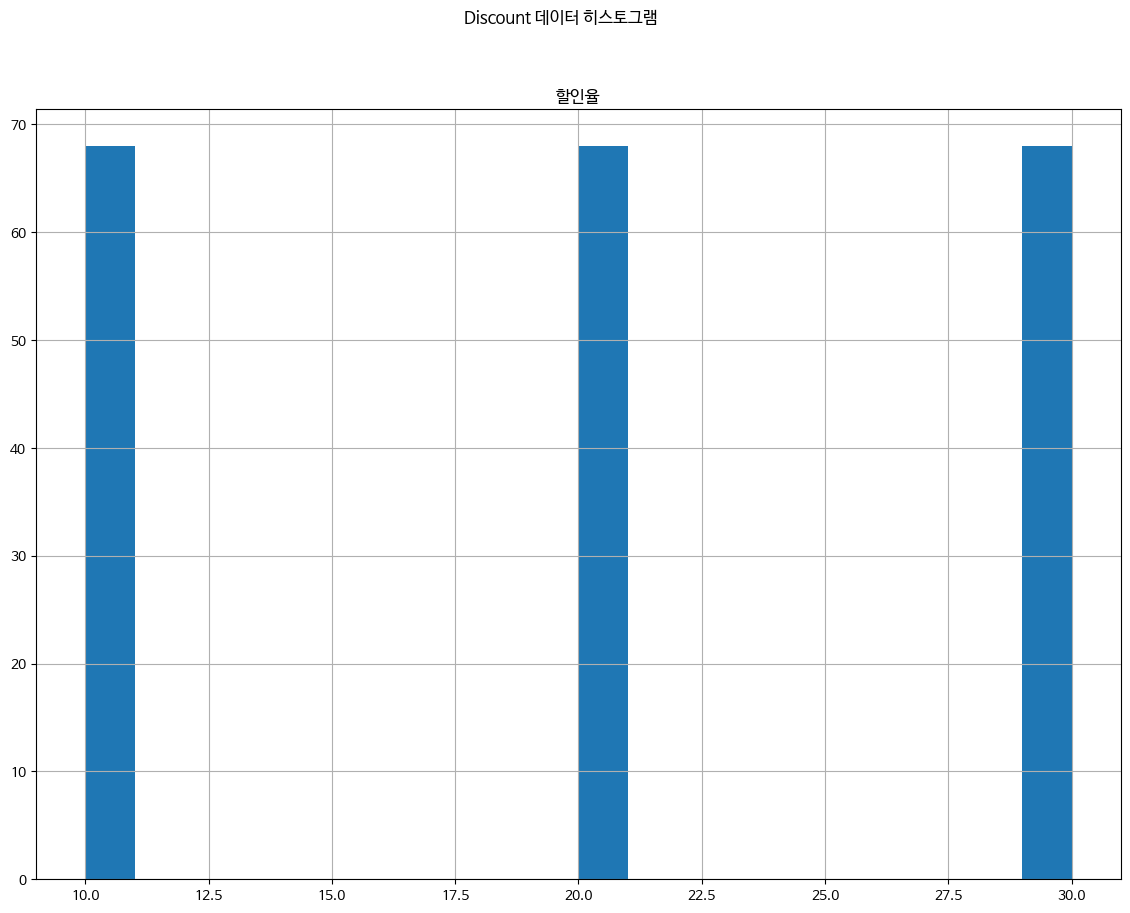

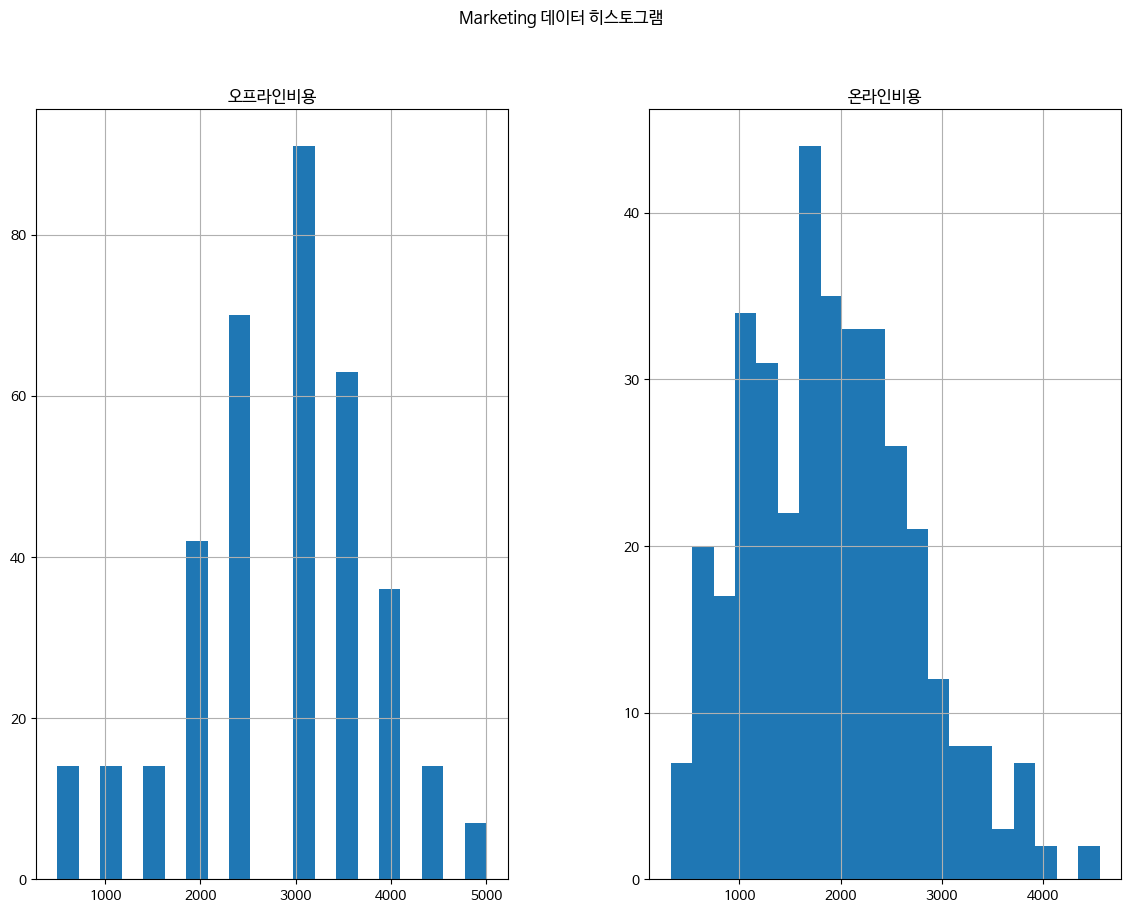

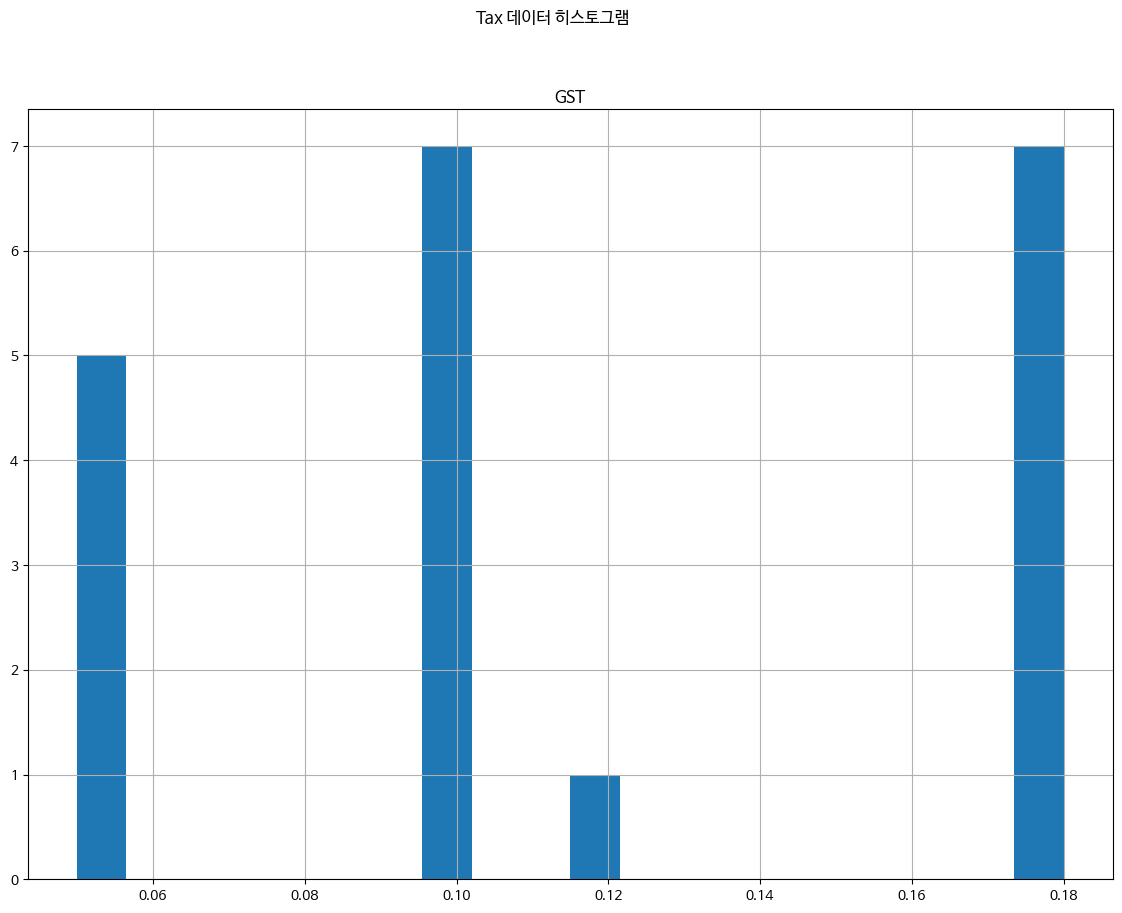

In [8]:
# Onlinesales 데이터 히스토그램
onlinesales.hist(bins=20, figsize=(14,10))
plt.suptitle("Onlinesales 데이터 히스토그램")
plt.show()

# Customer 데이터 히스토그램
customer.hist(bins=20, figsize=(14,10))
plt.suptitle("Customer 데이터 히스토그램")
plt.show()

# Discount 데이터 히스토그램
discount.hist(bins=20, figsize=(14,10))
plt.suptitle("Discount 데이터 히스토그램")
plt.show()

# Marketing 데이터 히스토그램
marketing.hist(bins=20, figsize=(14,10))
plt.suptitle("Marketing 데이터 히스토그램")
plt.show()

# Tax 데이터 히스토그램
tax.hist(bins=20, figsize=(14,10))
plt.suptitle("Tax 데이터 히스토그램")
plt.show()

박스플롯을 통한 이상치 탐지:

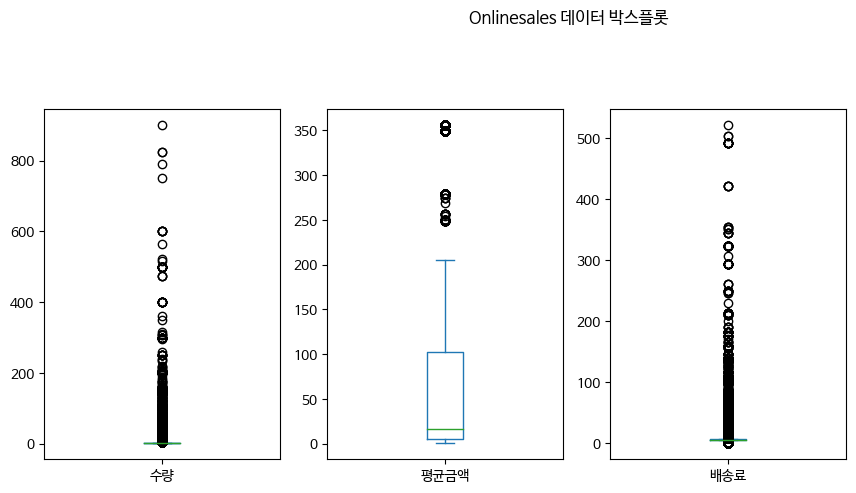

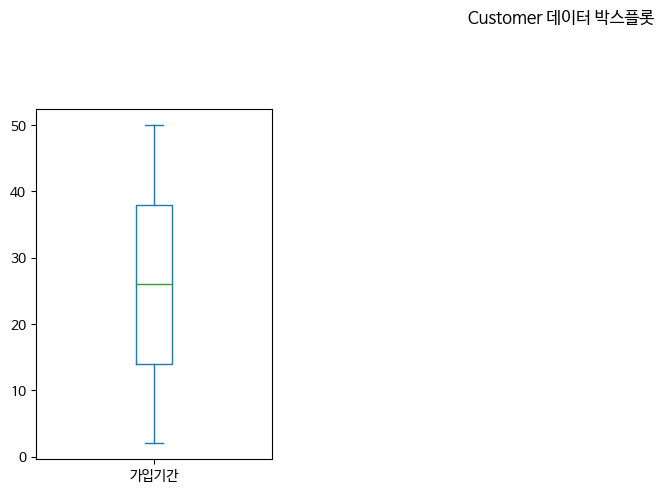

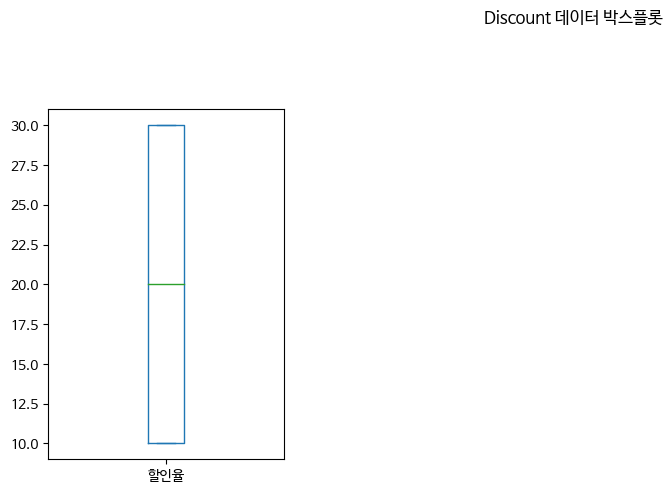

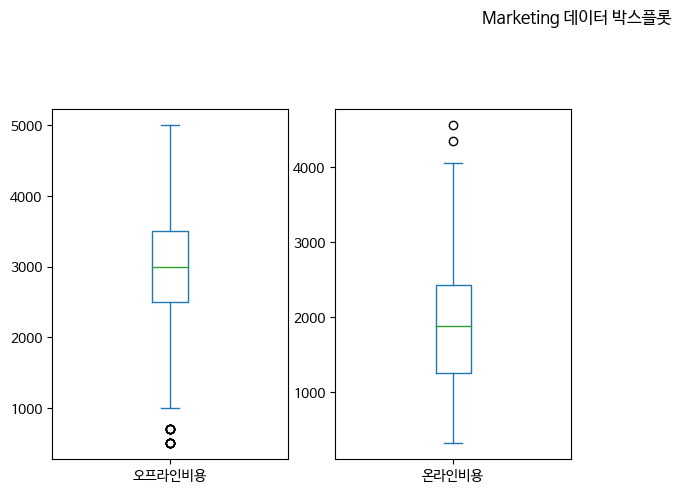

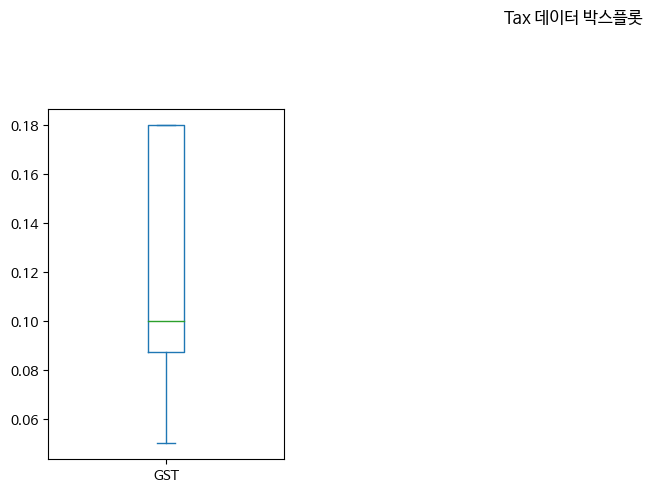

In [9]:
# Onlinesales 데이터 박스플롯
onlinesales.plot(kind='box', subplots=True, layout=(2,4), figsize=(14,10), sharex=False, sharey=False)
plt.suptitle("Onlinesales 데이터 박스플롯")
plt.show()

# Customer 데이터 박스플롯
customer.plot(kind='box', subplots=True, layout=(2,4), figsize=(14,10), sharex=False, sharey=False)
plt.suptitle("Customer 데이터 박스플롯")
plt.show()

# Discount 데이터 박스플롯
discount.plot(kind='box', subplots=True, layout=(2,4), figsize=(14,10), sharex=False, sharey=False)
plt.suptitle("Discount 데이터 박스플롯")
plt.show()

# Marketing 데이터 박스플롯
marketing.plot(kind='box', subplots=True, layout=(2,4), figsize=(14,10), sharex=False, sharey=False)
plt.suptitle("Marketing 데이터 박스플롯")
plt.show()

# Tax 데이터 박스플롯
tax.plot(kind='box', subplots=True, layout=(2,4), figsize=(14,10), sharex=False, sharey=False)
plt.suptitle("Tax 데이터 박스플롯")
plt.show()

💡
- 평균 구매 수량이 대부분 적으며 이상치가 존재한다.
- 평균 구매 금액 역시 평균 금액과 중앙 값의 차이가 크며, 이상치가 존재한다.
- 할인율은 10%, 20%, 30% 3가지 버전이 존재한다.
- 마케팅 비용은 온라인 보다 오프라인에 더 많은 금액을 투자하고 있고 각각 이상치가 존재한다.


### 2.2.2 범주형 변수의 분포 확인

In [10]:
# Onlinesales의 제품카테고리 분포 확인
print(onlinesales['제품카테고리'].value_counts())
print('-'*50)

# Customer의 고객지역 분포 확인
print(customer['고객지역'].value_counts())
print('-'*50)

# Discount의 제품카테고리 분포 확인
print(discount['제품카테고리'].value_counts())
print('-'*50)


제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64
--------------------------------------------------
고객지역
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64
--------------------------------------------------
제품카테고리
Apparel                 12
Waze                    12
Notebooks & Journals    12
Gift Cards              12
Accessories   

💡
- 가장 인기있는 제품은 Apparel, Nest-USA, Office로 확인된다. 이는 거래 주기가 짧은 제품들은 아니며 평균적으로 짧게는 60일, 길게는 180일로 확인된다. 카테고리에 식료품이 없는 것으로 확인되어 해당 비즈니스 모델이 거래주기 짧은 모델은 아님이 확인되었다.
- California, Chicago에 고객이 밀집되어 있다.

## 2.3 상관관계

### 2.3.1 수치형 상관관계

--------------------------------------------------
Onlinesales 수치형 변수 간의 상관 행렬:
            수량      평균금액       배송료
수량    1.000000 -0.113996  0.191383
평균금액 -0.113996  1.000000 -0.107799
배송료   0.191383 -0.107799  1.000000
--------------------------------------------------


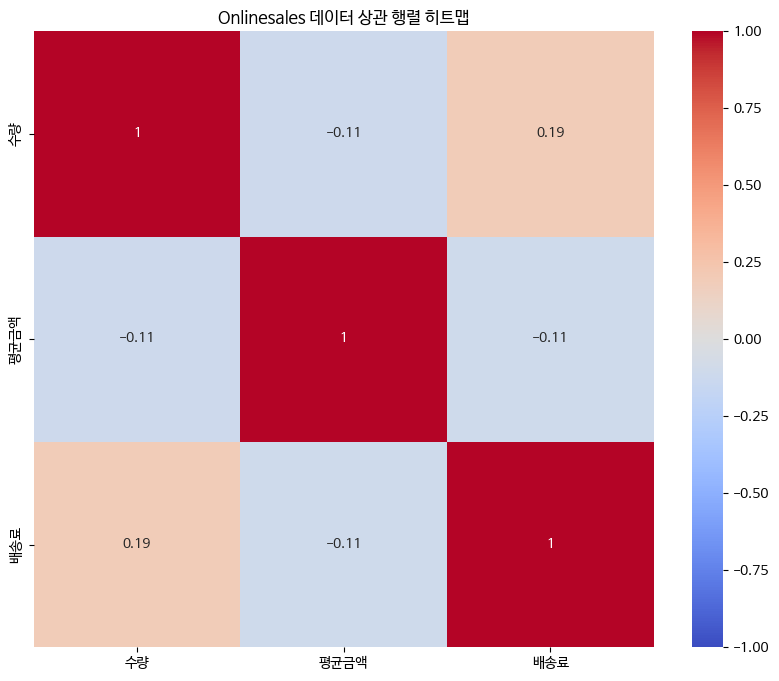

In [15]:
# 수치형 변수만 선택
numeric_cols = onlinesales.select_dtypes(include=['float64', 'int64'])

# 상관관계 계산
correlation_matrix = numeric_cols.corr()

# 상관 행렬 출력
print('-' * 50)
print("Onlinesales 수치형 변수 간의 상관 행렬:")
print(correlation_matrix)
print('-' * 50)

# 히트맵으로 상관관계 시각화
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Onlinesales 데이터 상관 행렬 히트맵")
plt.show()

💡
- 특정 제품의 판매 수량, 평균 금액, 그리고 배송료 간에 직접적인 연관성이 크지 않음을 나타낸다. 예를 들어, 고객이 많이 구매한다고 해서 평균 금액이 증가하거나 감소하지 않고, 배송료 또한 큰 영향을 받지 않을 가능성이 높다.

### 2.3.3 범주형 상관관계

--------------------------------------------------
제품카테고리별 거래 수:
제품카테고리
Accessories               234
Android                    43
Apparel                 18126
Backpacks                  89
Bags                     1882
Bottles                   268
Drinkware                3483
Fun                       160
Gift Cards                159
Google                    105
Headgear                  771
Housewares                122
Lifestyle                3092
More Bags                  46
Nest                     2198
Nest-Canada               317
Nest-USA                14013
Notebooks & Journals      749
Office                   6513
Waze                      554
Name: 거래ID, dtype: int64
--------------------------------------------------
--------------------------------------------------
제품카테고리별 평균 매출:
제품카테고리
Accessories               8.211068
Android                  15.903488
Apparel                  19.788995
Backpacks                80.046404
Bags                     29.830797
Bott

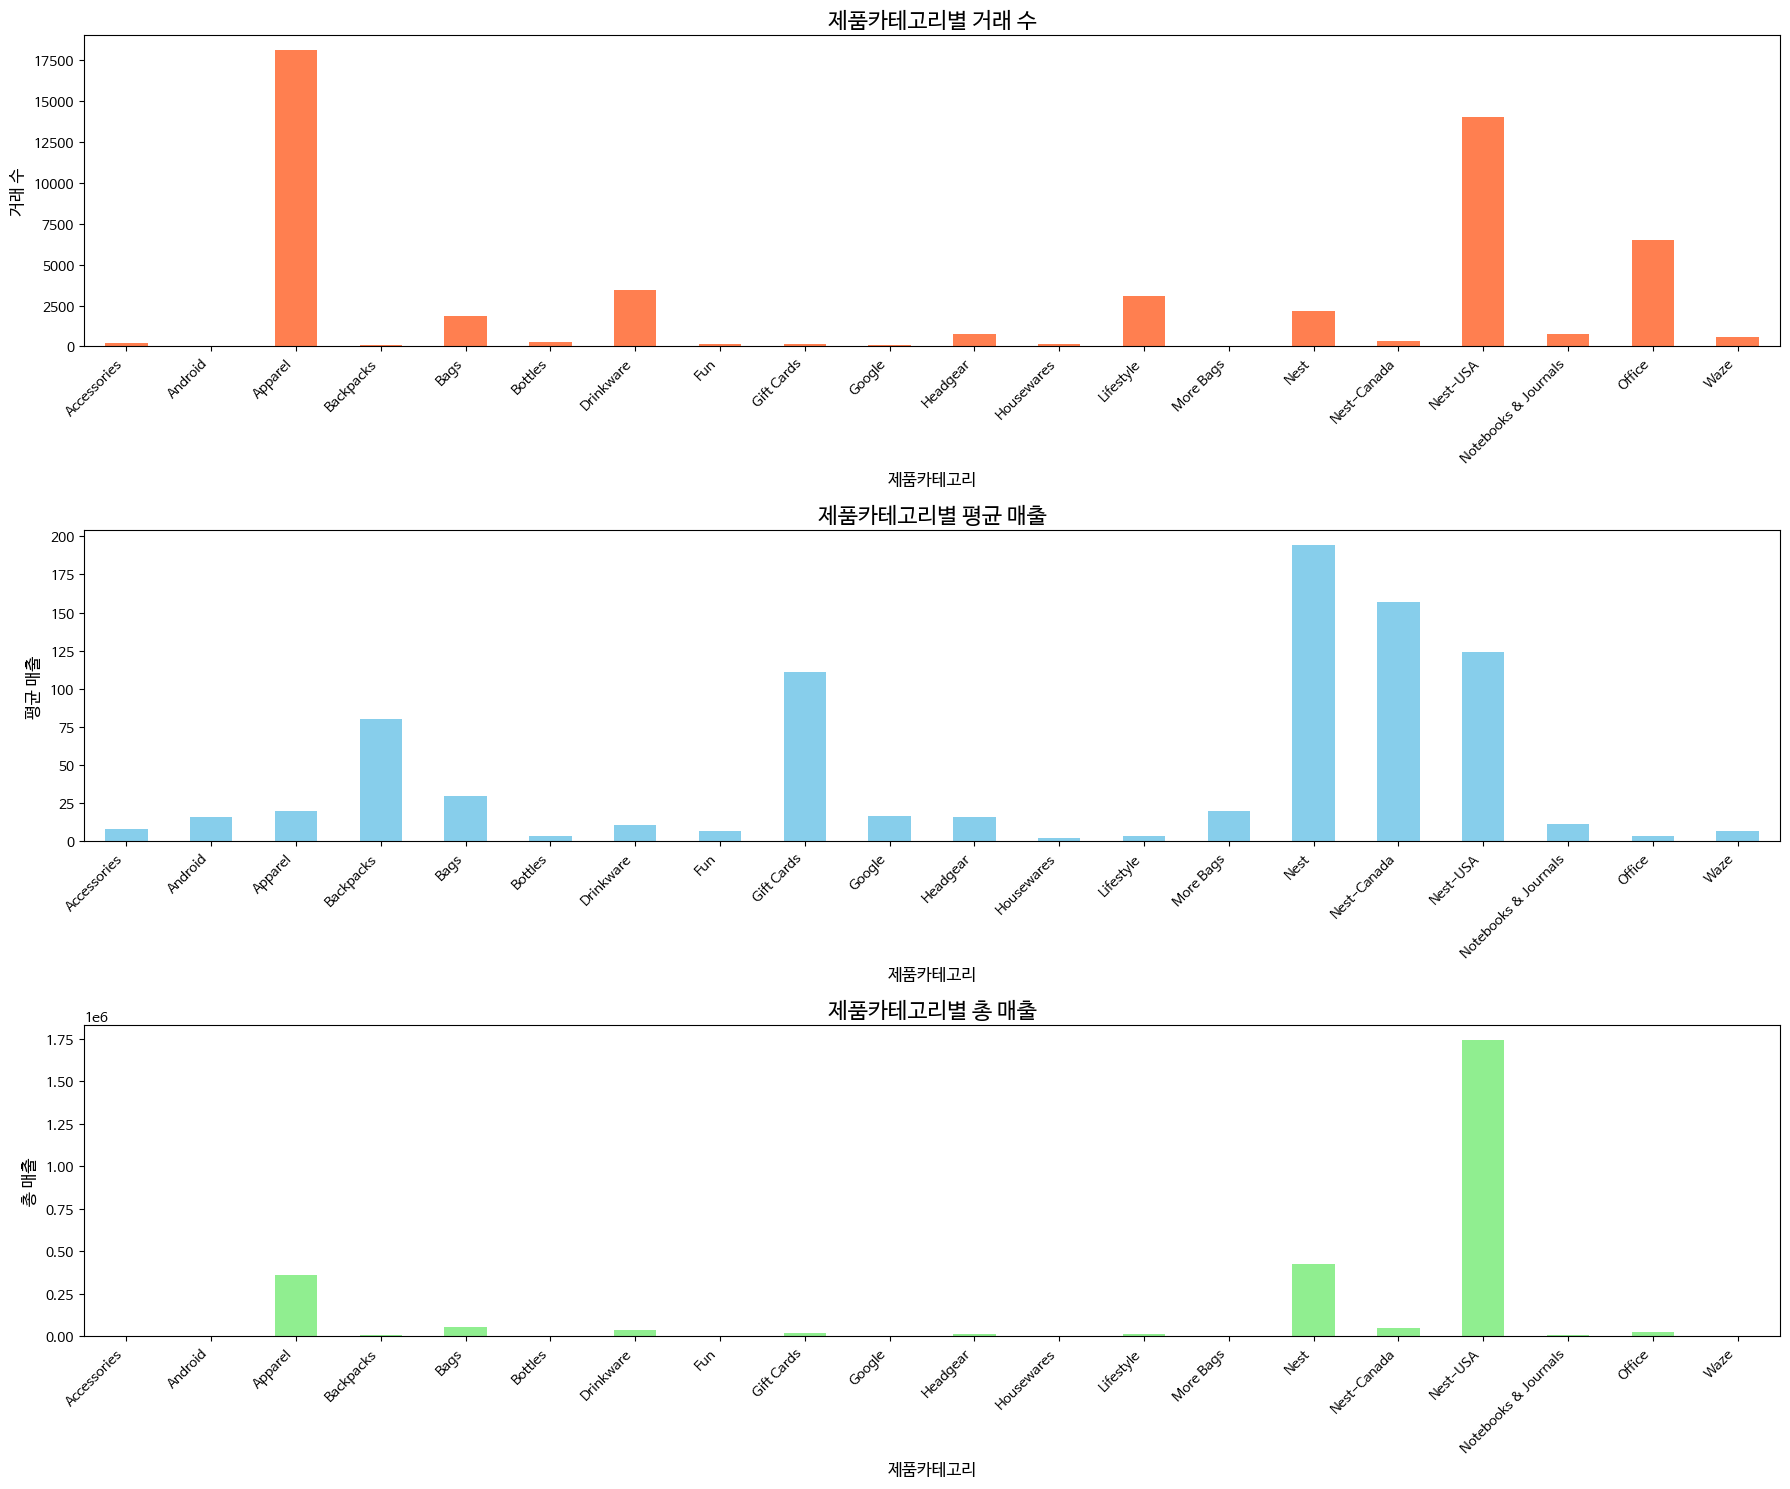

In [20]:
# 제품카테고리별 거래 수 계산
category_transaction_count = onlinesales.groupby('제품카테고리')['거래ID'].count()
print('-' * 50)
print("제품카테고리별 거래 수:")
print(category_transaction_count)
print('-' * 50)

# 제품카테고리별 평균 매출 계산
category_sales_mean = onlinesales.groupby('제품카테고리')['평균금액'].mean()
print('-' * 50)
print("제품카테고리별 평균 매출:")
print(category_sales_mean)
print('-' * 50)

# 제품카테고리별 총 매출 계산
category_sales_sum = onlinesales.groupby('제품카테고리')['평균금액'].sum()
print('-' * 50)
print("제품카테고리별 총 매출:")
print(category_sales_sum)
print('-' * 50)

# 시각화
plt.figure(figsize=(18, 15))  # 그래프 크기 조정

# 제품카테고리별 거래 수 시각화
plt.subplot(3, 1, 1)
category_transaction_count.plot(kind='bar', color='coral')
plt.title('제품카테고리별 거래 수', fontsize=16)
plt.xlabel('제품카테고리', fontsize=12)
plt.ylabel('거래 수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 제품카테고리별 평균 매출 시각화
plt.subplot(3, 1, 2)
category_sales_mean.plot(kind='bar', color='skyblue')
plt.title('제품카테고리별 평균 매출', fontsize=16)
plt.xlabel('제품카테고리', fontsize=12)
plt.ylabel('평균 매출', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 제품카테고리별 총 매출 시각화
plt.subplot(3, 1, 3)
category_sales_sum.plot(kind='bar', color='lightgreen')
plt.title('제품카테고리별 총 매출', fontsize=16)
plt.xlabel('제품카테고리', fontsize=12)
plt.ylabel('총 매출', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()  # 그래프 간 간격 자동 조정
plt.show()

💡
- 주요 매출 기여 카테고리:
  - Nest-USA 카테고리는 압도적으로 높은 총 매출을 기록하고 있으며, 이는 해당 카테고리의 제품들이 고가이며, 거래 수 또한 많다는 것을 의미한다. 이 카테고리는 비즈니스 매출에 큰 기여를 하고 있어, 집중적인 마케팅 전략이나 추가 제품 개발이 고려될 수 있다.
  - Apparel 카테고리는 거래 수는 많지만, 평균 매출이 상대적으로 낮다. 이를 통해 이 카테고리가 고객들에게 접근성이 높고, 자주 구매되는 제품들로 구성되어 있음을 알 수 있다. 다만, 이 카테고리에서의 매출을 더욱 증대시키기 위해 크로스 셀링(cross-selling) 전략 등을 활용할 수 있을 것이다.

- 저조한 성과 카테고리:
  - Housewares, More Bags, Fun 카테고리는 낮은 거래 수와 평균 매출로 인해 총 매출이 낮다. 이들 카테고리에 대해서는 마케팅 강화, 제품군 재편성, 가격 조정 등의 전략이 필요할 수 있다.
  - Android, More Bags는 거래 수가 매우 적고, 상대적으로 평균 매출도 낮은 편이다. 이들 카테고리에 대한 전략적 의사 결정이 필요하다. 예를 들어, 새로운 프로모션을 기획하거나, 제품군을 확장/축소하는 전략을 고려할 수 있다.

- 고가 제품의 역할:
  - Nest, Nest-Canada, Nest-USA는 상대적으로 높은 평균 매출을 보이며, 이들 카테고리는 프리미엄 제품군으로서 회사의 매출을 견인하는 주요한 역할을 하고 있다. 이러한 고가 제품들에 대한 마케팅 강화와 프리미엄 브랜드 이미지를 더욱 강화하는 전략이 필요할 수 있다.

# 3. 가설 설정 및 검증 - 테이블 별 EDA

## 3.1 Marketing

### 가설1. 마케팅 전략의 문제로 인해 재구매율이 낮다.

검증1. 마케팅 비용과 매출 간의 상관관계 분석:

In [11]:
# 날짜를 연월 형식으로 변환하여 월별 비용 합계 계산
marketing['날짜'] = pd.to_datetime(marketing['날짜'])
marketing['월'] = marketing['날짜'].dt.to_period('M')

# 월별 온라인 + 오프라인 마케팅 비용 합계
monthly_marketing_cost = marketing.groupby('월')[['오프라인비용', '온라인비용']].sum()
monthly_marketing_cost['총비용'] = monthly_marketing_cost['오프라인비용'] + monthly_marketing_cost['온라인비용']

print('-' * 50)
print("월별 마케팅 비용 (온라인 + 오프라인):")
print(monthly_marketing_cost)
print('-' * 50)

--------------------------------------------------
월별 마케팅 비용 (온라인 + 오프라인):
         오프라인비용     온라인비용        총비용
월                                   
2019-01   96600  58328.95  154928.95
2019-02   81300  55807.92  137107.92
2019-03   73500  48750.09  122250.09
2019-04   96000  61026.83  157026.83
2019-05   65500  52759.64  118259.64
2019-06   80500  53818.14  134318.14
2019-07   67500  52717.85  120217.85
2019-08   85500  57404.15  142904.15
2019-09   83000  52514.54  135514.54
2019-10   93500  57724.65  151224.65
2019-11   93000  68144.96  161144.96
2019-12  122000  76648.75  198648.75
--------------------------------------------------


In [12]:
# 거래날짜를 연월 형식으로 변환하여 월별 매출 합계 계산
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])
onlinesales['월'] = onlinesales['거래날짜'].dt.to_period('M')

# 월별 매출 합계 계산 (수량 * 평균금액)
monthly_sales = onlinesales.groupby('월').apply(lambda x: (x['수량'] * x['평균금액']).sum()).reset_index(name='총매출')

print('-' * 50)
print("월별 매출:")
print(monthly_sales)
print('-' * 50)

--------------------------------------------------
월별 매출:
          월        총매출
0   2019-01  403624.58
1   2019-02  310819.80
2   2019-03  349608.09
3   2019-04  401618.42
4   2019-05  307763.42
5   2019-06  321081.38
6   2019-07  372638.07
7   2019-08  401210.37
8   2019-09  360548.40
9   2019-10  409681.28
10  2019-11  508942.62
11  2019-12  523258.19
--------------------------------------------------


In [13]:
# 마케팅 비용과 매출 데이터를 병합
merged_data = pd.merge(monthly_marketing_cost, monthly_sales, on='월', how='inner')

print('-' * 50)
print("병합된 월별 마케팅 비용 및 매출 데이터:")
print(merged_data)
print('-' * 50)

--------------------------------------------------
병합된 월별 마케팅 비용 및 매출 데이터:
          월  오프라인비용     온라인비용        총비용        총매출
0   2019-01   96600  58328.95  154928.95  403624.58
1   2019-02   81300  55807.92  137107.92  310819.80
2   2019-03   73500  48750.09  122250.09  349608.09
3   2019-04   96000  61026.83  157026.83  401618.42
4   2019-05   65500  52759.64  118259.64  307763.42
5   2019-06   80500  53818.14  134318.14  321081.38
6   2019-07   67500  52717.85  120217.85  372638.07
7   2019-08   85500  57404.15  142904.15  401210.37
8   2019-09   83000  52514.54  135514.54  360548.40
9   2019-10   93500  57724.65  151224.65  409681.28
10  2019-11   93000  68144.96  161144.96  508942.62
11  2019-12  122000  76648.75  198648.75  523258.19
--------------------------------------------------


--------------------------------------------------
월별 마케팅 비용과 매출 간의 상관관계:
          총비용       총매출
총비용  1.000000  0.851503
총매출  0.851503  1.000000
--------------------------------------------------


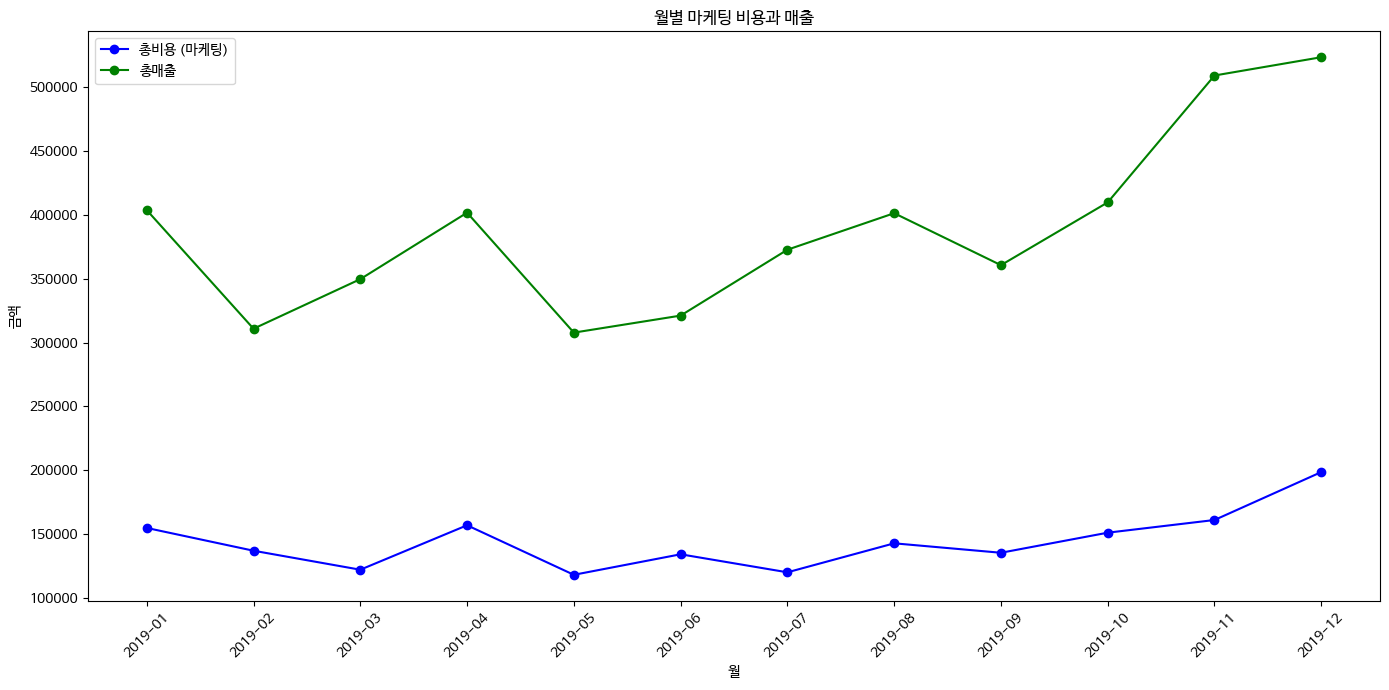

In [17]:
# 상관관계 계산
correlation = merged_data[['총비용', '총매출']].corr()

print('-' * 50)
print("월별 마케팅 비용과 매출 간의 상관관계:")
print(correlation)
print('-' * 50)


# 시각화
plt.figure(figsize=(14, 7))

plt.plot(merged_data['월'].astype(str), merged_data['총비용'], marker='o', color='blue', label='총비용 (마케팅)')
plt.plot(merged_data['월'].astype(str), merged_data['총매출'], marker='o', color='green', label='총매출')

plt.title('월별 마케팅 비용과 매출')
plt.xlabel('월')
plt.ylabel('금액')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

💡
- 전반적으로 매출이 증가하는 추세를 보이고 있으며, 마케팅 비용과의 상관관계가 0.85로 마케팅 비용이 증가함에 따라 매출도 증가함을 나타내고 있다.
- 그러나 이것은 상관관계이지 인과관계가 아니기 때문에 마케팅 비용 증가가 원인이 될 순 없다.
- 마케팅 효과 때문이라는 점을 입증하기 위해 9월 이후 매출이 급증한 이유와 초기 리텐션이 유독 높았던 코호트 분석 결과를 통해 마케팅의 변화가 있었는지 살펴봐야한다.

검증 1-1. 쿠폰 사용율 비교 : 월 별 쿠폰 사용율을 비교하여 마케팅 활동이 영향이 있었는지 확인하기

In [20]:
# 거래날짜를 연월 형식으로 변환하여 월별로 분석 가능하도록 설정
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])
onlinesales['월'] = onlinesales['거래날짜'].dt.to_period('M')

# 월별 쿠폰 사용 상태의 비율 계산
monthly_coupon_usage = onlinesales.groupby(['월', '쿠폰상태']).size().unstack(fill_value=0)
monthly_coupon_usage_percentage = monthly_coupon_usage.div(monthly_coupon_usage.sum(axis=1), axis=0) * 100

print('-' * 50)
print("월별 쿠폰 사용율 (%):")
print(monthly_coupon_usage_percentage)
print('-' * 50)

--------------------------------------------------
월별 쿠폰 사용율 (%):
쿠폰상태       Clicked   Not Used       Used
월                                       
2019-01  51.070637  14.890475  34.038888
2019-02  51.004872  15.560292  33.434836
2019-03  50.230097  15.807639  33.962264
2019-04  50.939759  14.602410  34.457831
2019-05  51.968504  15.398075  32.633421
2019-06  50.226568  15.931314  33.842118
2019-07  51.513997  15.025709  33.460293
2019-08  50.552846  15.414634  34.032520
2019-09  49.976679  15.275187  34.748134
2019-10  50.888569  15.249760  33.861671
2019-11  50.845746  14.718505  34.435749
2019-12  51.243892  15.615282  33.140826
--------------------------------------------------


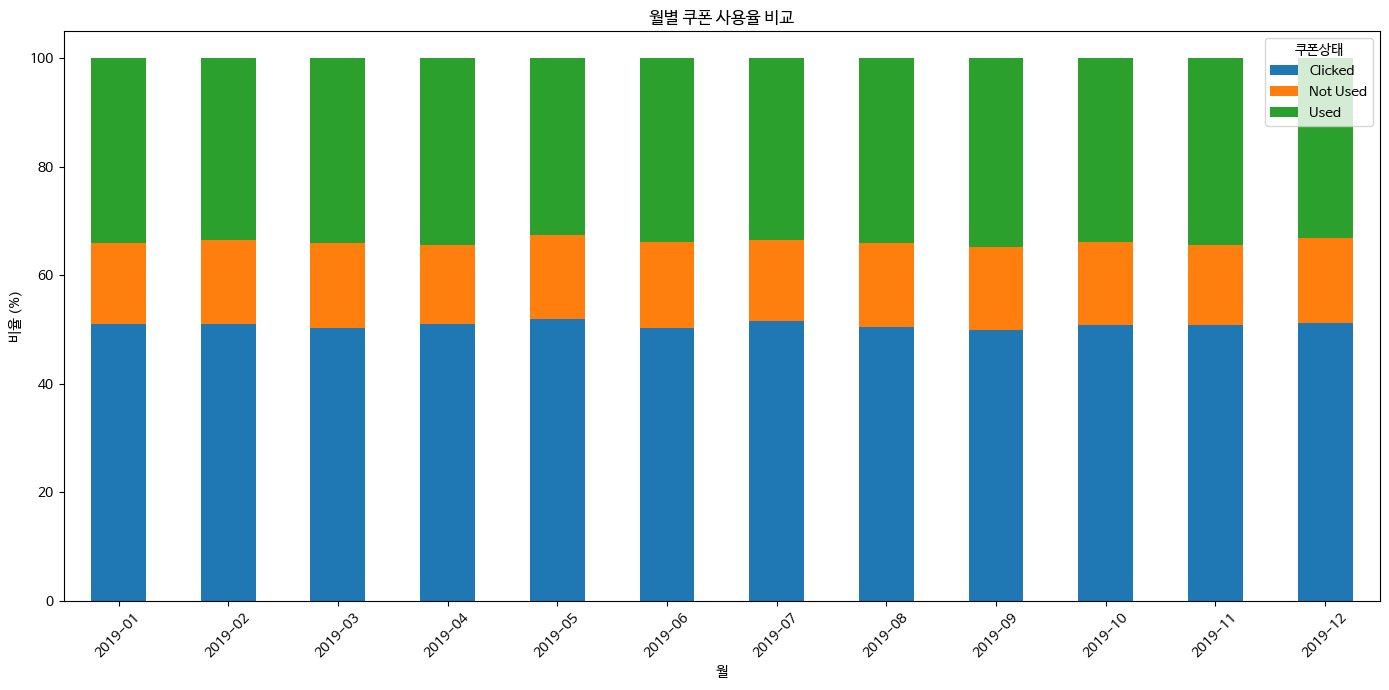

In [21]:
# 쿠폰 사용율 시각화
monthly_coupon_usage_percentage.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('월별 쿠폰 사용율 비교')
plt.xlabel('월')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend(title='쿠폰상태')
plt.tight_layout()
plt.show()

💡
- 쿠폰 사용 패턴에 큰 변화가 없다. 이는 쿠폰을 이용한 마케팅 캠페인이 효율적이지 못함을 뜻한다.
- Clicked 비율이 앞도적으로 높고 Used가 뒤따라오는 것을 보아 쿠폰에 대한 관심도가 높지만 타겟팅이 제대로 이루어지지 않아 사용할 수 없었던 것으로 확인된다. 추후 쿠폰 EDA를 통해 전략 수정이 필요함을 나타낸다.
- 해당 데이터에서는 추가적인 캠페인 활동을 확인하기 어려워 마케팅의 효율성을 판단하기에는 어려움이 있다.

검증 1-2. 제품 카테고리 분석: 카테고리 비교를 통해 9월 이후의 매출 급증이 특정 제품 카테고리의 판매 증가와 관련이 있는지 분석

In [22]:
# 월별 카테고리별 판매 수량 집계
monthly_category_quantity = onlinesales.groupby(['월', '제품카테고리'])['수량'].sum().unstack()

print('-' * 50)
print("월별 카테고리별 판매 수량:")
print(monthly_category_quantity)
print('-' * 50)

--------------------------------------------------
월별 카테고리별 판매 수량:
제품카테고리   Accessories  Android  Apparel  Backpacks    Bags  Bottles  Drinkware  \
월                                                                               
2019-01          1.0      4.0   1500.0        3.0   860.0    185.0     2140.0   
2019-02          NaN      1.0   1559.0        6.0  2151.0    107.0     1866.0   
2019-03          1.0      7.0   2303.0        7.0  1421.0    182.0     2976.0   
2019-04          4.0      2.0   4052.0       16.0  1344.0    140.0     3022.0   
2019-05          6.0      5.0   2829.0       24.0  1158.0    316.0     2272.0   
2019-06          7.0     10.0   2551.0        4.0  1503.0    165.0     3353.0   
2019-07         44.0      9.0   4307.0        8.0  1197.0    294.0     2539.0   
2019-08         14.0      7.0   3950.0       15.0  2110.0     93.0     3900.0   
2019-09         56.0      NaN   3731.0        7.0  1055.0    433.0     3169.0   
2019-10        201.0      NaN   1733.0    

In [25]:
# 월별 카테고리별 매출 집계 (수량 * 평균금액)
monthly_category_sales = onlinesales.groupby(['월', '제품카테고리']).apply(lambda x: (x['수량'] * x['평균금액']).sum()).unstack()

print('-' * 50)
print("월별 카테고리별 매출:")
print(monthly_category_sales)
print('-' * 50)

--------------------------------------------------
월별 카테고리별 매출:
제품카테고리   Accessories  Android   Apparel  Backpacks      Bags  Bottles  \
월                                                                       
2019-01        51.57    74.24  38300.87     268.19  10903.63   587.30   
2019-02          NaN    19.99  37990.09     559.94  17969.55   372.93   
2019-03        59.99   115.93  59059.02     639.93  14045.65   524.98   
2019-04       166.96    39.98  88138.14    1015.04  11385.03   489.00   
2019-05       141.14    91.95  58850.90    1371.76   9962.99  1076.84   
2019-06       207.73   171.90  45941.01     298.36  12867.37   564.95   
2019-07      1862.36   115.91  65356.00     719.92  11933.01  1023.46   
2019-08       322.66    81.13  53304.78    1339.85  16271.60   333.87   
2019-09      1271.24      NaN  55663.53     619.93   9255.85  1532.07   
2019-10       805.19      NaN  21718.72    1579.81  14436.38   418.25   
2019-11      1691.57      NaN  18585.80     359.96  12905.98

<Figure size 1400x800 with 0 Axes>

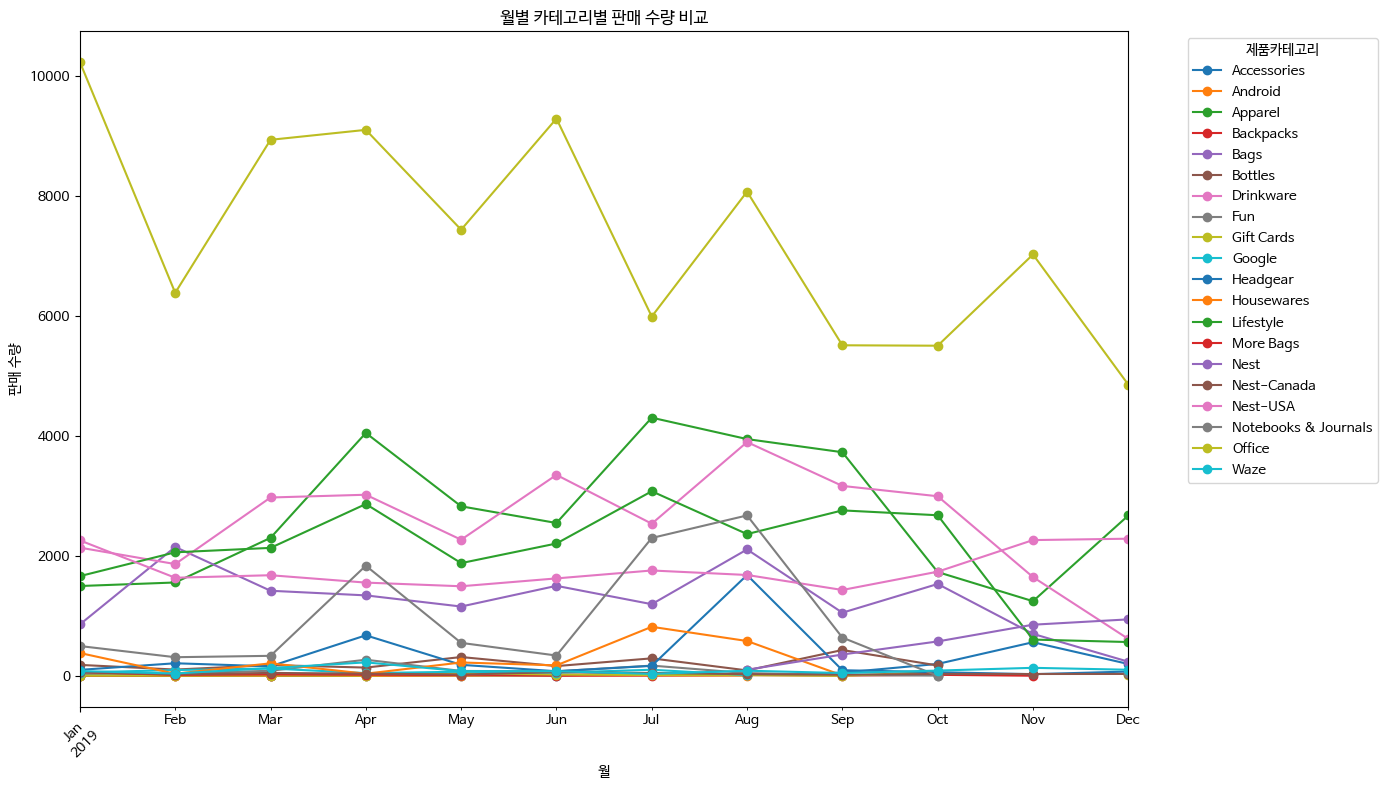

In [24]:
plt.figure(figsize=(14, 8))

# 월별 카테고리별 판매 수량 시각화
monthly_category_quantity.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('월별 카테고리별 판매 수량 비교')
plt.xlabel('월')
plt.ylabel('판매 수량')
plt.xticks(rotation=45)
plt.legend(title='제품카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

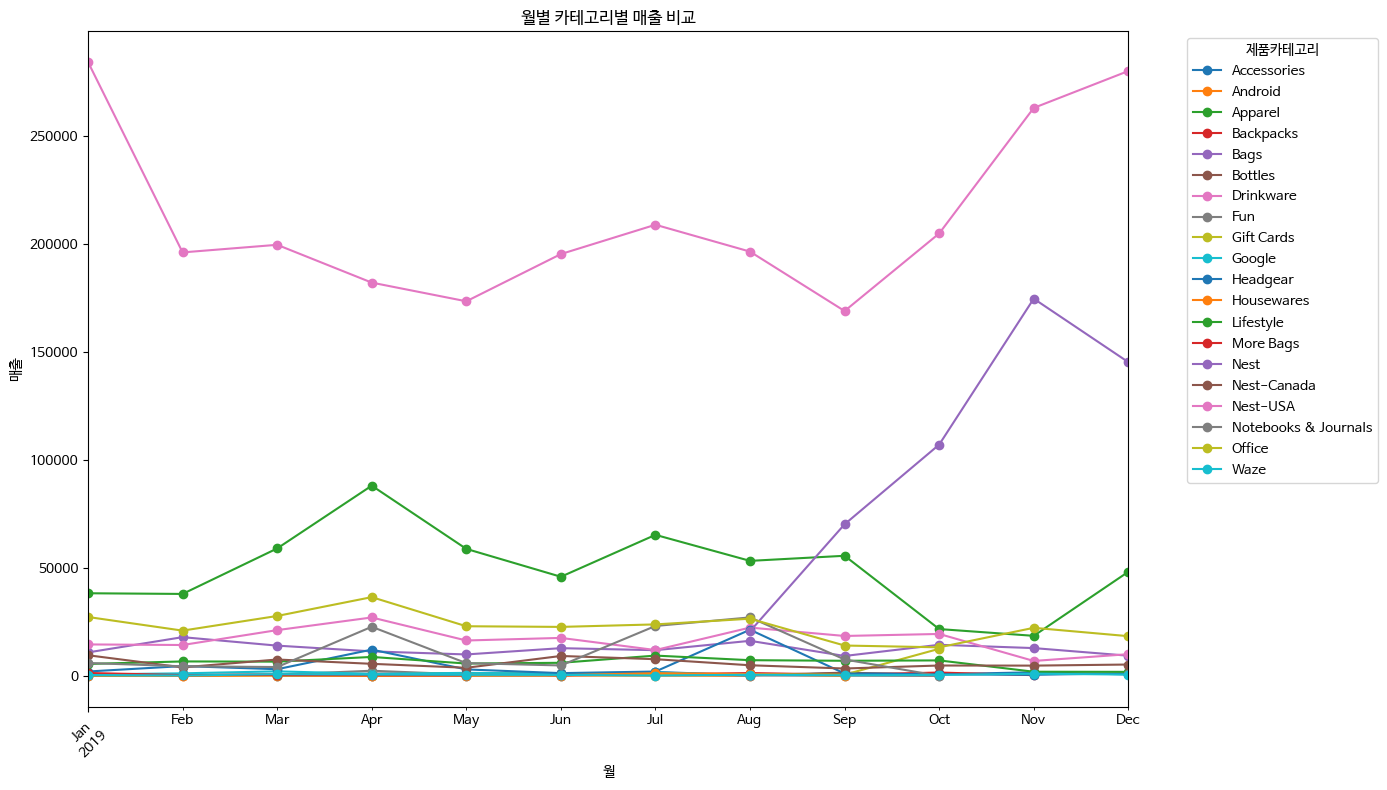

In [26]:
plt.figure(figsize=(14, 8))

# 월별 카테고리별 매출 시각화
monthly_category_sales.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('월별 카테고리별 매출 비교')
plt.xlabel('월')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.legend(title='제품카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

💡
- 전체 매출 및 수량을 확인하니 눈에 띄는 것은 Nest, Nest-USA의 급증이다. 두 개의 카테고리 단가가 높은 것을 앞서 EDA를 통해 확인했기에 두 제품의 수량 증가로 인한 매출 증가로 생각하는 편이 논리적이다.
- 카테고리가 너무 많아 시각적으로 확인하는데 불편함이 있어 9월 이후 10월에 증가한 제품들만 추려 시각적으로 확인해고자 한다.

In [27]:
# 9월과 10월 데이터만 추출
sept_quantity = monthly_category_quantity.loc['2019-09']
oct_quantity = monthly_category_quantity.loc['2019-10']

sept_sales = monthly_category_sales.loc['2019-09']
oct_sales = monthly_category_sales.loc['2019-10']

# 수량 및 매출이 증가한 카테고리 필터링
increased_quantity_categories = oct_quantity[oct_quantity > sept_quantity].index
increased_sales_categories = oct_sales[oct_sales > sept_sales].index

# 수량 및 매출 모두 증가한 카테고리
increased_categories = increased_quantity_categories.intersection(increased_sales_categories)

print("수량 및 매출이 증가한 카테고리:")
print(increased_categories)

수량 및 매출이 증가한 카테고리:
Index(['Backpacks', 'Bags', 'Gift Cards', 'Nest', 'Nest-Canada', 'Nest-USA',
       'Waze'],
      dtype='object', name='제품카테고리')


<Figure size 1400x800 with 0 Axes>

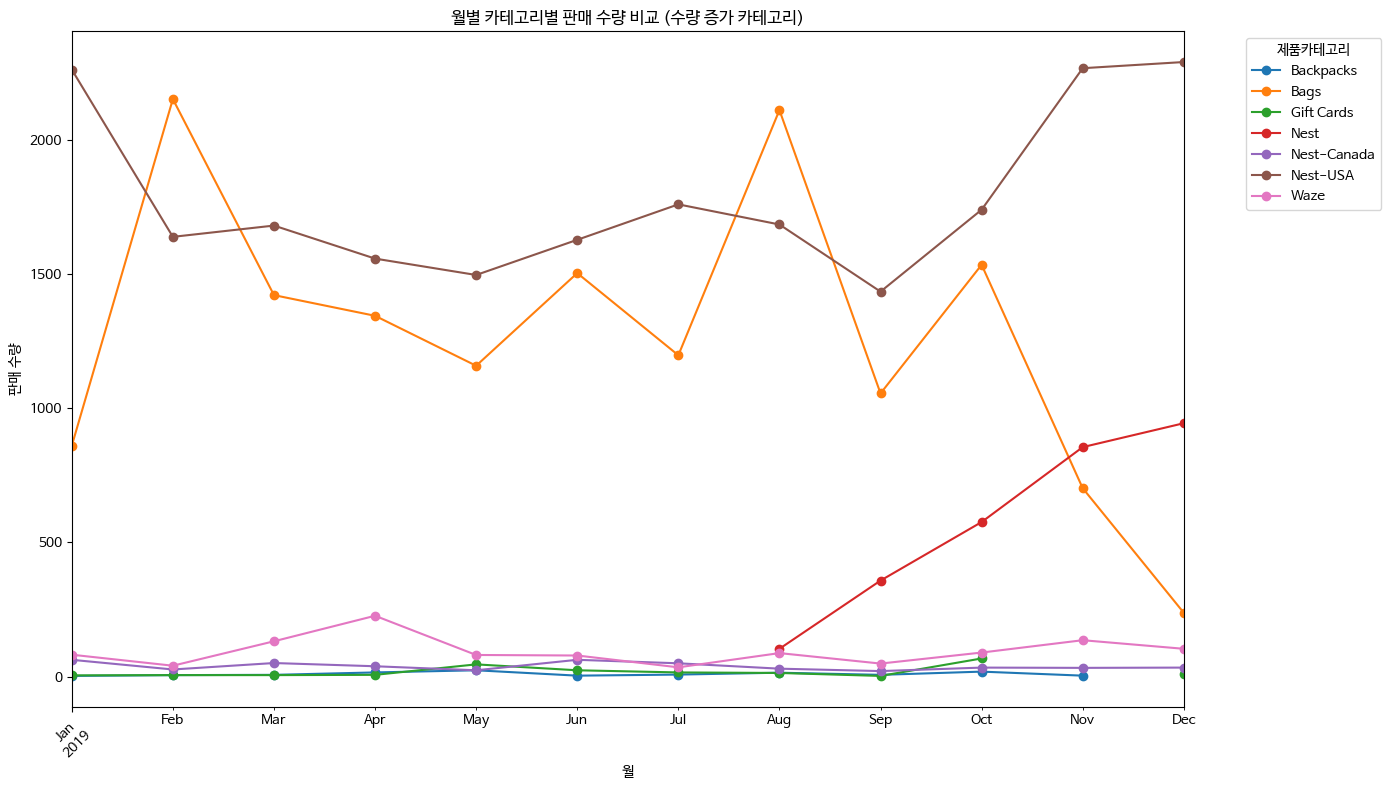

In [28]:
plt.figure(figsize=(14, 8))

# 증가한 카테고리에 대한 월별 판매 수량 시각화
monthly_category_quantity[increased_categories].plot(kind='line', marker='o', figsize=(14, 8))

plt.title('월별 카테고리별 판매 수량 비교 (수량 증가 카테고리)')
plt.xlabel('월')
plt.ylabel('판매 수량')
plt.xticks(rotation=45)
plt.legend(title='제품카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

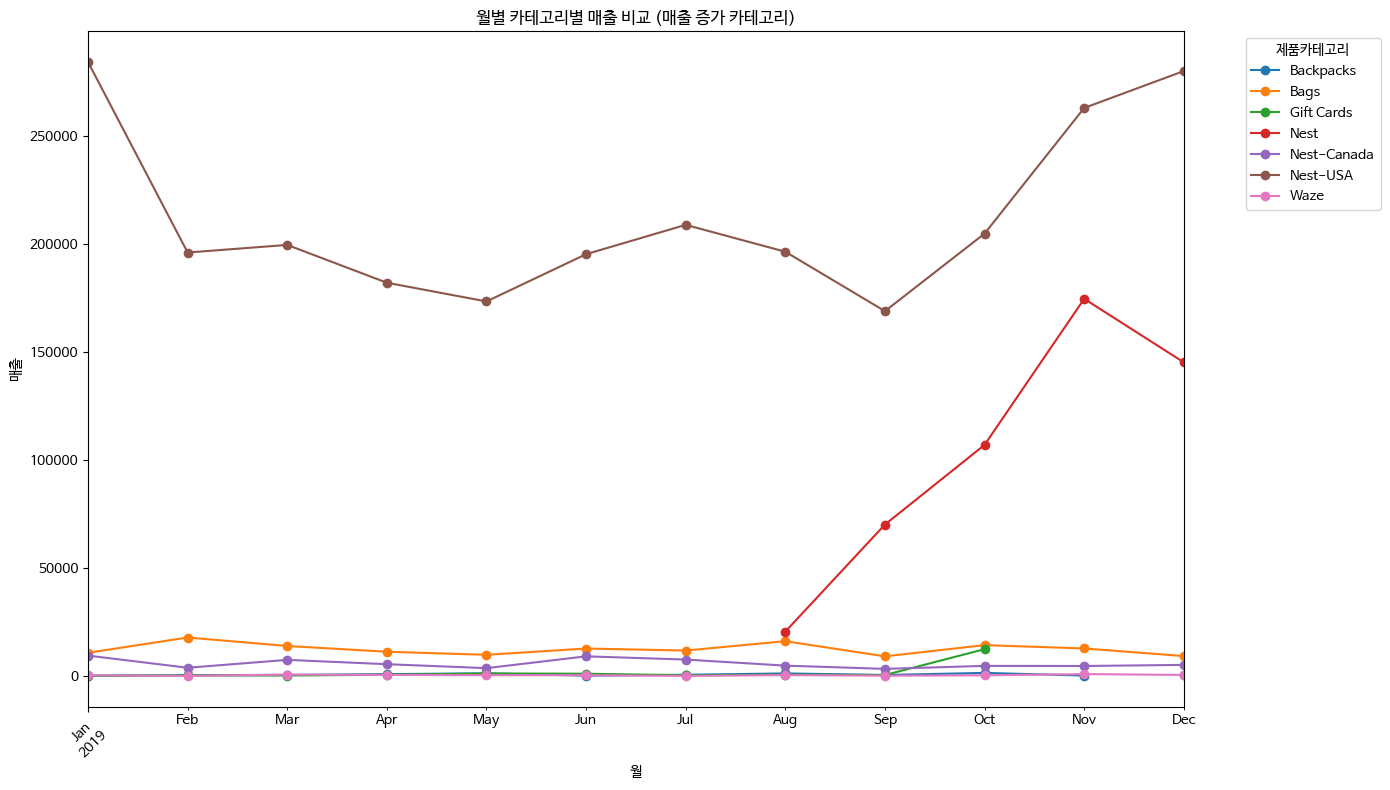

In [29]:
plt.figure(figsize=(14, 8))

# 증가한 카테고리에 대한 월별 매출 시각화
monthly_category_sales[increased_categories].plot(kind='line', marker='o', figsize=(14, 8))

plt.title('월별 카테고리별 매출 비교 (매출 증가 카테고리)')
plt.xlabel('월')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.legend(title='제품카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Nest, Nest-USA가 매출에 차지하는 비율

In [31]:
# 10월, 11월, 12월 매출 데이터 필터링
oct_sales = monthly_category_sales.loc['2019-10']
nov_sales = monthly_category_sales.loc['2019-11']
dec_sales = monthly_category_sales.loc['2019-12']

# 각 월의 전체 매출 합계 계산
total_sales_oct = oct_sales.sum()
total_sales_nov = nov_sales.sum()
total_sales_dec = dec_sales.sum()

# Nest와 Nest-USA 카테고리의 매출 합계 계산
nest_sales_oct = oct_sales[['Nest', 'Nest-USA']]
nest_sales_nov = nov_sales[['Nest', 'Nest-USA']]
nest_sales_dec = dec_sales[['Nest', 'Nest-USA']]

# 각 월별 Nest와 Nest-USA가 차지하는 비율 계산
nest_percentage_oct = (nest_sales_oct / total_sales_oct) * 100
nest_percentage_nov = (nest_sales_nov / total_sales_nov) * 100
nest_percentage_dec = (nest_sales_dec / total_sales_dec) * 100

print("10월 Nest와 Nest-USA가 차지하는 비율:")
print(nest_percentage_oct)
print("\n11월 Nest와 Nest-USA가 차지하는 비율:")
print(nest_percentage_nov)
print("\n12월 Nest와 Nest-USA가 차지하는 비율:")
print(nest_percentage_dec)

10월 Nest와 Nest-USA가 차지하는 비율:
제품카테고리
Nest        26.153497
Nest-USA    50.026938
Name: 2019-10, dtype: float64

11월 Nest와 Nest-USA가 차지하는 비율:
제품카테고리
Nest        34.334912
Nest-USA    51.696201
Name: 2019-11, dtype: float64

12월 Nest와 Nest-USA가 차지하는 비율:
제품카테고리
Nest        27.778738
Nest-USA    53.547202
Name: 2019-12, dtype: float64


Nest, Nest-USA에 발행된 쿠폰

In [38]:
# Nest와 Nest-USA 카테고리에 해당하는 쿠폰만 필터링
nest_discounts = discount[discount['제품카테고리'].isin(['Nest', 'Nest-USA'])]

# Nest와 Nest-USA에 대한 쿠폰 정보 출력
print('-' * 50)
print("Nest 및 Nest-USA 카테고리의 발행된 쿠폰 정보:")
print(nest_discounts[['월', '제품카테고리', '쿠폰코드', '할인율']])
print('-' * 50)

--------------------------------------------------
Nest 및 Nest-USA 카테고리의 발행된 쿠폰 정보:
       월    제품카테고리    쿠폰코드  할인율
3    Jan  Nest-USA  ELEC10   10
4    Feb  Nest-USA  ELEC20   20
5    Mar  Nest-USA  ELEC30   30
24   Jan      Nest    NE10   10
25   Feb      Nest    NE20   20
26   Mar      Nest    NE30   30
54   Apr  Nest-USA  ELEC10   10
55   May  Nest-USA  ELEC20   20
56   Jun  Nest-USA  ELEC30   30
75   Apr      Nest    NE10   10
76   May      Nest    NE20   20
77   Jun      Nest    NE30   30
105  Jul  Nest-USA  ELEC10   10
106  Aug  Nest-USA  ELEC20   20
107  Sep  Nest-USA  ELEC30   30
126  Jul      Nest    NE10   10
127  Aug      Nest    NE20   20
128  Sep      Nest    NE30   30
156  Oct  Nest-USA  ELEC10   10
157  Nov  Nest-USA  ELEC20   20
158  Dec  Nest-USA  ELEC30   30
177  Oct      Nest    NE10   10
178  Nov      Nest    NE20   20
179  Dec      Nest    NE30   30
--------------------------------------------------


💡
- Nest 제품은 8월부터 판매가 이루어졌으며, 단가 및 수량이 급증한 것으로 확인된다.
- Nest-USA 역시 1월 이후 감소하는 추세를 보이다가 10월 이후 크게 증가하는 모습이 보여진다.
- 두 제품은 단가가 높은 제품으로 매출에 영향을 크게 미쳤다.
- Nest, Nest-USA에 대한 쿠폰 역시 매달 일정한 비율로 발행되었으므로 쿠폰의 발행 여부 및 사용은 해당 카테고리의 수량 증가에 영향을 미치지 못했다고 판단된다.

### Action Item
마케팅 전략, 특히 쿠폰 마케팅이 재구매율을 높이는 데 성공하지 못했음을 알 수 있다. 매출 증가는 주로 특정 고가 제품군의 수요 증가에 기인했으며, 마케팅 활동(특히 쿠폰 발행)과의 직접적인 인과관계는 확인되지 않다. 따라서 재구매율을 높이기 위해서는 다음과 같은 개선이 필요합니다:
- 쿠폰 마케팅 전략 재검토: 고객의 니즈에 맞는 타겟팅과 혜택을 제공하는 쿠폰 전략이 필요하다. 쿠폰 사용률을 높이고, 이를 통해 재구매율을 향상시킬 수 있는 방안이 모색되어야 한다. (성별, 지역 별 CLV를 확인하여 맞춤형 쿠폰 마케팅)
- 제품군에 따른 맞춤형 마케팅: 고가 제품군의 판매 증대를 위한 맞춤형 마케팅 전략이 필요하다. 특히, 매출 증대에 기여한 제품군에 대한 집중적인 프로모션을 고려할 수 있다. (가설2에서 좀 더 정확하게 진단)

## 3.2 Category

### 가설2. 특정 제품군에 집중하지 않고 제품군을 늘리면 재구매율이 늘어난다.

검증1. 카테고리의 다양성에 따라 고객의 CLV가 차이가 난다.

CLV 계산 절차
이상치 제거:
기준: 수량 <= 300 & 평균금액 <= 279

평균 구매 가치 계산:
평균 구매 가치 = 특정 기간 내 총 수익 / 특정 기간 내 총 구매 횟수

평균 구매 빈도 계산:
같은 날 같은 고객이 구매한 경우 하나의 거래로 간주하여 계산.

고객 생애 가치(CLTV) 계산:
CLV = 평균 구매 가치 × 평균 구매 빈도 × 고객 평균 유지 기간
고객 평균 유지 기간은 onlinesales의 가입 기간을 활용하여 산출.

In [57]:
# 거래 날짜를 datetime 형식으로 변환
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])

# 이상치 제거
filtered_sales = onlinesales[(onlinesales['수량'] <= 300) & (onlinesales['평균금액'] <= 279)]

# 같은 날, 동일한 고객이 동일 제품군을 구매한 경우를 1회 구매로 간주
unique_purchases = filtered_sales.drop_duplicates(subset=['고객ID', '거래날짜'])

# 고객별 총 수익 계산
customer_total_revenue = filtered_sales.groupby('고객ID')['매출'].sum()

# 고객별 총 구매 횟수 계산
customer_purchase_count = unique_purchases.groupby('고객ID')['거래ID'].count()

# 고객별 평균 구매 가치 계산
customer_avg_purchase_value = customer_total_revenue / customer_purchase_count

# 고객 평균 유지 기간 계산 (가입 기간을 활용)
customer_avg_lifespan = customer.set_index('고객ID')['가입기간']

# 고객 생애 가치 (CLTV) 계산
customer_clv = customer_avg_purchase_value * customer_purchase_count * customer_avg_lifespan

# 결과 출력
print("고객별 CLV:")
print(customer_clv.head())

고객별 CLV:
고객ID
USER_0000       960.69
USER_0001    269718.00
USER_0002     56242.68
USER_0003     34001.75
USER_0004     44716.57
dtype: float64


In [58]:
# 고객별 구매한 고유 제품군 수 계산
customer_product_diversity = filtered_sales.groupby('고객ID')['제품카테고리'].nunique()

# 결과 출력
print("고객별 구매한 고유 제품군 수:")
print(customer_product_diversity.head())

고객별 구매한 고유 제품군 수:
고객ID
USER_0000     2
USER_0001    10
USER_0002     6
USER_0003     4
USER_0004     7
Name: 제품카테고리, dtype: int64


제품군 수에 따른 평균 CLV:
제품군 수
1     4.231884e+03
2     1.612420e+04
3     2.306163e+04
4     2.988626e+04
5     4.012489e+04
6     5.490631e+04
7     7.040478e+04
8     9.587544e+04
9     1.176172e+05
10    1.766972e+05
11    1.962254e+05
12    1.788630e+05
13    2.296557e+05
14    3.199826e+05
15    3.344862e+05
16    6.637847e+05
17    1.420631e+06
19    1.707148e+06
Name: CLV, dtype: float64


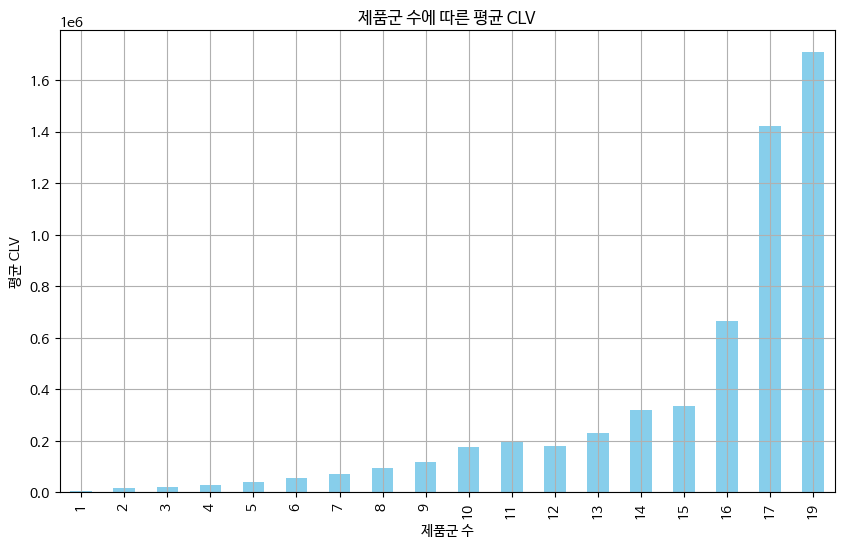

In [59]:
# CLV와 제품군 수를 결합한 데이터프레임 생성
clv_diversity_data = pd.DataFrame({
    'CLV': customer_clv,
    '제품군 수': customer_product_diversity
})

# 제품군 수에 따른 CLV의 평균 계산
clv_by_diversity = clv_diversity_data.groupby('제품군 수')['CLV'].mean()

# 결과 출력
print("제품군 수에 따른 평균 CLV:")
print(clv_by_diversity)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
clv_by_diversity.plot(kind='bar', color='skyblue')
plt.title('제품군 수에 따른 평균 CLV')
plt.xlabel('제품군 수')
plt.ylabel('평균 CLV')
plt.grid(True)
plt.show()

💡
- 그래프와 데이터에서 볼 수 있듯이, 고객이 구매한 제품군의 수가 증가할수록 CLV(고객 생애 가치)가 급격히 상승하는 경향이 있다. 특히 15개 이상의 제품군을 구매한 고객의 CLV가 현저히 높다.
- 제안 전략
  - 제품군 다양성 촉진: 제품 추천 시스템을 강화하거나, 번들 프로모션을 통해 다양한 제품군을 구매할 동기를 부여할 수 있다. (ex. 크로스셀링)
  - 고객 세그먼트 기반 맞춤형 마케팅: 고객 등급 별 맞춤 전략에 사용
- 그렇다면 카테고리 별 어떤 특성을 확인하여 어떤 전략을 시행하는 것이 좋을까?

검증 1-1. 제품군을 늘리기 위한 카테고리 별 특성을 파악하여 전략 세우기

 매출 비중과 재구매율 간의 관계 분석


--------------------------------------------------
제품군별 매출 비중 (%):
제품카테고리
Nest-USA                54.684537
Apparel                 12.656215
Nest                    11.094333
Office                   5.926067
Drinkware                4.297081
Bags                     3.239586
Notebooks & Journals     2.292671
Lifestyle                1.592571
Nest-Canada              1.518166
Headgear                 1.144804
Gift Cards               0.418212
Google                   0.201689
Backpacks                0.187820
Accessories              0.156202
Bottles                  0.148233
Waze                     0.135136
Fun                      0.129079
Housewares               0.099283
More Bags                0.063093
Android                  0.015223
Name: 매출, dtype: float64
--------------------------------------------------
--------------------------------------------------
Top 7 제품군별 매출 비중 (%):
제품카테고리
Nest-USA                54.684537
Apparel                 12.656215
Nest                  

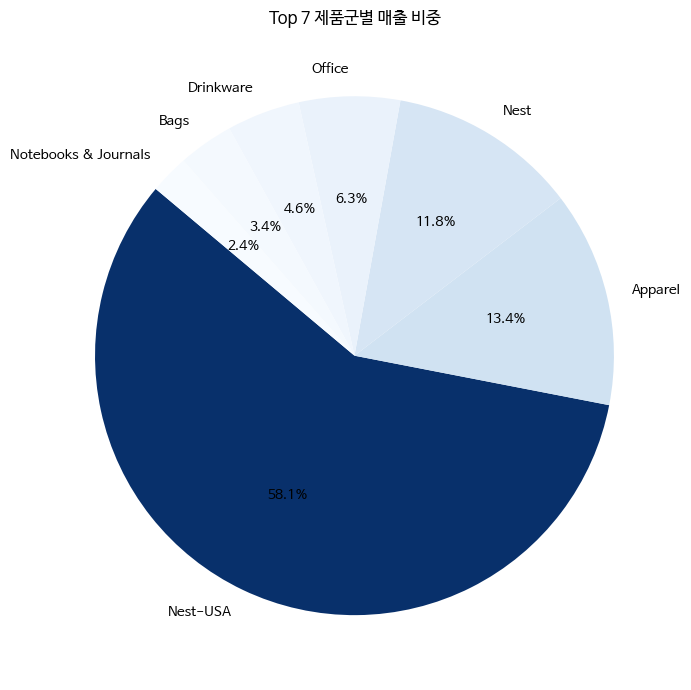

In [52]:
# 거래 날짜를 datetime 형식으로 변환 (이미 변환된 경우 생략 가능)
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])

# 제품군별 매출 계산 (수량 * 평균금액)
onlinesales['매출'] = onlinesales['수량'] * onlinesales['평균금액']

# 제품군별 매출 합계 계산
category_sales = onlinesales.groupby('제품카테고리')['매출'].sum()

# 전체 매출 합계
total_sales = category_sales.sum()

# 각 제품군이 차지하는 매출 비중 계산
category_sales_percentage = (category_sales / total_sales) * 100

# 결과 출력
print('-' * 50)
print("제품군별 매출 비중 (%):")
print(category_sales_percentage.sort_values(ascending=False))
print('-' * 50)

# 매출 비중 상위 7개 제품군 선택
top_7_sales = category_sales_percentage.sort_values(ascending=False).head(7)

# 결과 출력
print('-' * 50)
print("Top 7 제품군별 매출 비중 (%):")
print(top_7_sales)
print('-' * 50)

from matplotlib import cm
from matplotlib.colors import Normalize

# Normalize 설정 (비중이 클수록 색상이 진해지도록)
norm = Normalize(vmin=top_7_sales.min(), vmax=top_7_sales.max())
colors = [cm.Blues(norm(value)) for value in top_7_sales]

# Top 7 제품군별 매출 비중 파이 차트 시각화
plt.figure(figsize=(10, 7))
plt.pie(top_7_sales, labels=top_7_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 7 제품군별 매출 비중')
plt.tight_layout()
plt.show()

In [54]:
# 같은 날, 동일한 고객이 동일 제품군을 구매한 경우를 1회 구매로 간주
# 고객ID, 제품카테고리, 거래날짜 기준으로 중복을 제거 (중복 제거 시 수량 합산 안 함)
unique_purchases = onlinesales.drop_duplicates(subset=['고객ID', '제품카테고리', '거래날짜'])

# 고객별, 제품군별로 그룹화하여 각 고객의 고유한 구매 횟수를 계산
customer_purchase_count = unique_purchases.groupby(['고객ID', '제품카테고리'])['거래ID'].count().reset_index()

# 고객이 2회 이상 구매한 경우를 재구매로 간주
customer_purchase_count['재구매여부'] = customer_purchase_count['거래ID'] > 1

# 제품군별 재구매율 계산 (재구매한 고객 수 / 총 고객 수)
category_repeat_rate = customer_purchase_count.groupby('제품카테고리')['재구매여부'].mean() * 100

# 결과 출력
print('-' * 50)
print("제품군별 재구매율 (%):")
print(category_repeat_rate.sort_values(ascending=False))
print('-' * 50)

--------------------------------------------------
제품군별 재구매율 (%):
제품카테고리
Apparel                 44.142101
Nest-USA                42.698413
Office                  35.539438
Drinkware               30.903156
Lifestyle               27.906977
Bags                    24.862637
Nest                    21.124031
Headgear                19.294118
Notebooks & Journals    18.537859
Waze                    15.533981
Bottles                 11.822660
Nest-Canada             11.219512
Fun                     11.016949
Accessories             10.000000
Google                   5.617978
Backpacks                5.333333
Housewares               4.672897
Android                  2.380952
Gift Cards               1.298701
More Bags                0.000000
Name: 재구매여부, dtype: float64
--------------------------------------------------


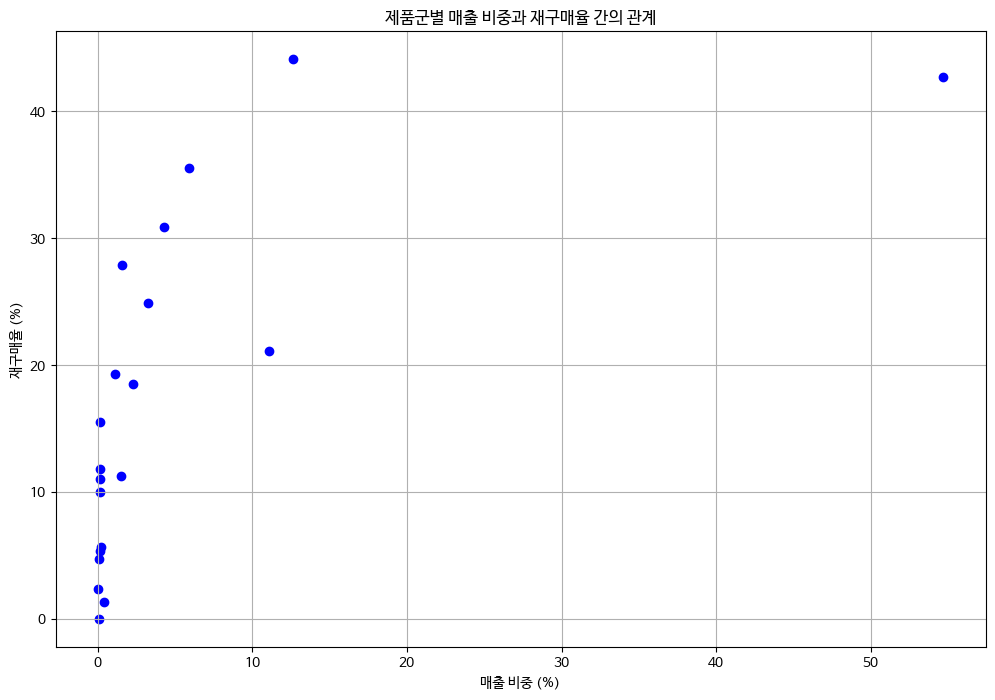

--------------------------------------------------
제품군별 매출 비중과 재구매율 간의 관계:
                      매출 비중 (%)   재구매율 (%)
제품카테고리                                    
Nest-USA              54.684537  42.698413
Apparel               12.656215  44.142101
Nest                  11.094333  21.124031
Office                 5.926067  35.539438
Drinkware              4.297081  30.903156
Bags                   3.239586  24.862637
Notebooks & Journals   2.292671  18.537859
Lifestyle              1.592571  27.906977
Nest-Canada            1.518166  11.219512
Headgear               1.144804  19.294118
Gift Cards             0.418212   1.298701
Google                 0.201689   5.617978
Backpacks              0.187820   5.333333
Accessories            0.156202  10.000000
Bottles                0.148233  11.822660
Waze                   0.135136  15.533981
Fun                    0.129079  11.016949
Housewares             0.099283   4.672897
More Bags              0.063093   0.000000
Android               

In [55]:
# 매출 비중과 재구매율 데이터 병합
relationship_data = pd.DataFrame({
    '매출 비중 (%)': category_sales_percentage,
    '재구매율 (%)': category_repeat_rate
})

# 매출 비중과 재구매율 간의 관계 시각화
plt.figure(figsize=(12, 8))
plt.scatter(relationship_data['매출 비중 (%)'], relationship_data['재구매율 (%)'], color='blue')
plt.title('제품군별 매출 비중과 재구매율 간의 관계')
plt.xlabel('매출 비중 (%)')
plt.ylabel('재구매율 (%)')
plt.grid(True)
plt.show()

# 데이터 출력
print('-' * 50)
print("제품군별 매출 비중과 재구매율 간의 관계:")
print(relationship_data.sort_values(by='매출 비중 (%)', ascending=False))
print('-' * 50)

💡
- 일반적으로 매출 비중이 높은 제품군일수록 재구매율도 높지만, 일부 제품군에서는 이 관계가 약해지거나 반대되는 경향도 나타난다.
- 매출 비중이 높으면서도 재구매율이 낮은 제품군(Nest 등)에 대해서는 고객이 재구매할 수 있는 유인책(예: 쿠폰, 리퍼럴 프로그램 등)을 강화하는 전략이 필요하다.
- Drinkware, Office 등과 같이 재구매율이 높은 제품군은 지속적인 마케팅 지원과 더불어, 관련 제품군의 크로스셀링(Cross-Selling)을 고려할 수 있다.
- 재구매율 높은 제품군의 지속적인 마케팅을 위해 카테고리 별 평균 금액을 확인하여 마케팅 전략에 집중할 고려사항이 있는지 알아봐야한다.

In [56]:
# 카테고리별 평균 금액 계산
category_avg_price = onlinesales.groupby('제품카테고리')['평균금액'].mean()

# 결과 출력
print('-' * 50)
print("카테고리별 평균 금액 (달러):")
print(category_avg_price.sort_values(ascending=False))
print('-' * 50)

--------------------------------------------------
카테고리별 평균 금액 (달러):
제품카테고리
Nest                    194.221074
Nest-Canada             157.243249
Nest-USA                124.331850
Gift Cards              111.363270
Backpacks                80.046404
Bags                     29.830797
Apparel                  19.788995
More Bags                19.776957
Google                   16.446190
Android                  15.903488
Headgear                 15.879624
Notebooks & Journals     11.758505
Drinkware                10.696893
Accessories               8.211068
Fun                       6.743812
Waze                      6.607852
Lifestyle                 3.860078
Office                    3.770012
Bottles                   3.437201
Housewares                2.060574
Name: 평균금액, dtype: float64
--------------------------------------------------


### Action Item

**고가 제품**
  - Nest, Nest-Canada, Nest-USA: 매출 비중이 높고 재구매율도 어느 정도 유지되고 있지만, 고가 제품 특성상 재구매율이 다른 저가 제품군보다 낮을 가능성이 크다. 장기적인 고객 유지 전략이 필요하다. 예를 들어, 고가 제품을 구매한 고객에게는 추가 보증 서비스, 제품 연장 보장, 프리미엄 고객 서비스 등을 제공할 수 있다. 또한, 업그레이드 할인이나 보상 프로그램을 통해 고객이 동일 브랜드의 다른 제품을 재구매할 수 있도록 유도할 수 있다.
  - Gift Cards: 평균 금액이 111로 높은 편이며, 고객들이 주로 선물용으로 구매하는 제품군이다. Gift Cards는 주로 특정 시기에 집중적으로 판매될 가능성이 크므로, 시즌별 캠페인을 통해 재구매를 유도할 수 있다. 예를 들어, 연말 시즌, 생일 기념 할인 등을 통해 고객들이 다시 Gift Cards를 구매하도록 유도하는 것이 좋다.

**중가 제품**
  - Apparel (의류): 평균 금액이 19.78로 비교적 낮고, 재구매율이 높습니다. 이 제품군은 고객이 반복적으로 구매할 가능성이 매우 높다. 의류 제품은 VIP 고객 프로그램이나 구매 빈도에 따른 할인 혜택을 통해 고객 충성도를 강화할 수 있다. 또한, 신제품 출시 알림이나 추천 코디 제안 등을 통해 고객의 지속적인 관심을 유지할 수 있다.
  - Bags, Backpacks: 평균 금액이 각각 29.83, 80.04로 중간 정도이며, 재구매율도 중간 이상. 크로스셀링 전략을 강화하는 것이 유효할 수 있다. 예를 들어, 가방을 구매한 고객에게는 관련 액세서리나 가방 관리 용품을 제안하는 방식으로 추가 매출을 창출할 수 있다.

**저가제품**
  - Drinkware, Office: 평균 금액이 각각 10.69, 3.77로 저가 제품에 속하며, 재구매율이 높다. 구매 주기에 따른 자동 재구매 서비스를 제공하거나 묶음 판매를 통해 매출을 증대시킬 수 있다. 또한, 소셜 미디어 캠페인을 통해 충성 고객층을 확대할 수 있다.
  - Accessories, Fun: 평균 금액이 매우 낮고, 재구매율도 상대적으로 낮다. : 이들 제품군에 대해서는 무료 배송 혜택이나 할인 쿠폰 제공 등을 통해 고객의 재구매를 유도할 필요가 있다. 특히, 충동 구매를 촉진할 수 있는 마케팅 전략(예: 한정 시간 할인, 1+1 프로모션 등)을 활용할 수 있다.

## 3.3 Customer

### 가설3. 고객의 수가 가장 많았던 California, Chicago가 CLV가 상대적으로 높을 것이다.

검증 1. 지역 별 CLV 비교

In [62]:
# 고객 지역별로 고객 수를 계산
customer_region_count = customer.groupby('고객지역')['고객ID'].count()

# 고객 수가 많은 상위 지역 확인
top_regions = customer_region_count.sort_values(ascending=False).head()

# 결과 출력
print("고객 수가 많은 상위 지역:")
print(top_regions)

고객 수가 많은 상위 지역:
고객지역
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: 고객ID, dtype: int64


지역별 평균 CLV:
고객지역
California       78139.188901
Chicago          87263.689101
New Jersey       64980.208859
New York         70270.361759
Washington DC    86175.272933
Name: CLV, dtype: float64


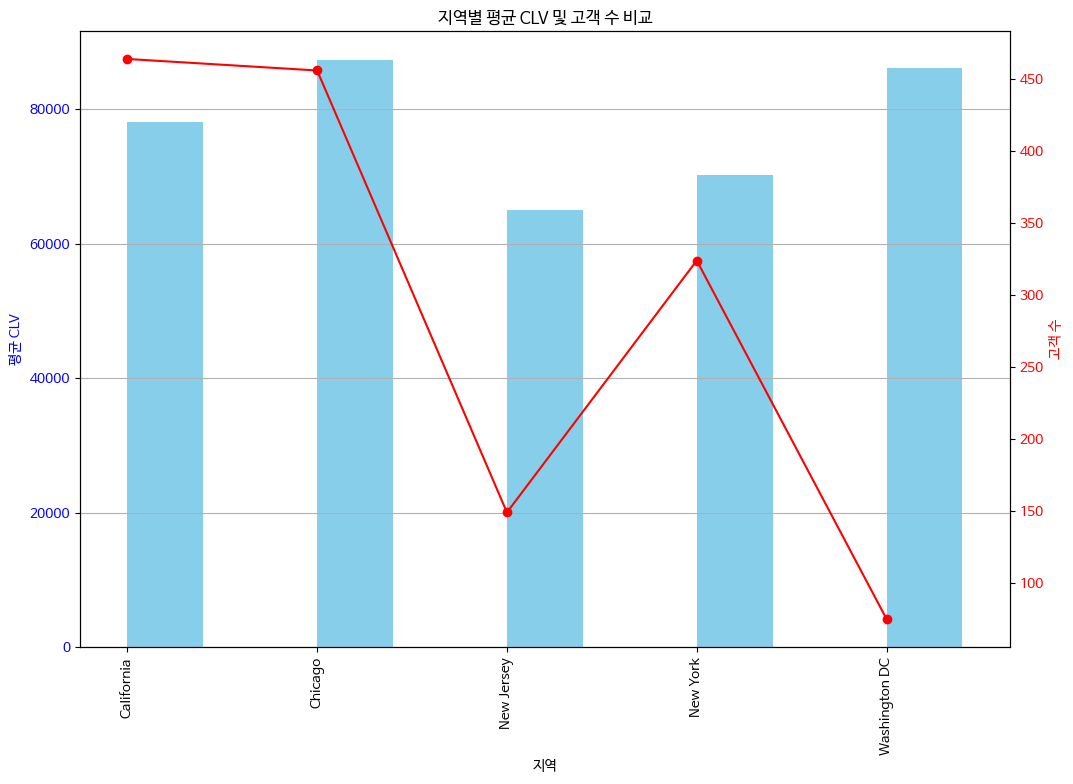

In [66]:
# Onlinesales와 Customer 데이터 결합
merged_data = pd.merge(filtered_sales, customer, on='고객ID')

# 같은 날, 동일한 고객이 동일 제품군을 구매한 경우를 1회 구매로 간주
unique_purchases = merged_data.drop_duplicates(subset=['고객ID', '거래날짜'])

# 고객별 총 수익 계산
customer_total_revenue = merged_data.groupby('고객ID')['매출'].sum()

# 고객별 총 구매 횟수 계산
customer_purchase_count = unique_purchases.groupby('고객ID')['거래ID'].count()

# 고객별 평균 구매 가치 계산
customer_avg_purchase_value = customer_total_revenue / customer_purchase_count

# 고객 평균 유지 기간 계산 (가입 기간을 활용)
customer_avg_lifespan = customer.set_index('고객ID')['가입기간']

# 고객 생애 가치 (CLTV) 계산
customer_clv = customer_avg_purchase_value * customer_purchase_count * customer_avg_lifespan

# 고객ID와 고객지역을 결합한 데이터프레임 생성
clv_with_region = pd.DataFrame({
    'CLV': customer_clv,
    '고객지역': customer.set_index('고객ID')['고객지역']
})

# 지역별 평균 CLV 계산
region_clv = clv_with_region.groupby('고객지역')['CLV'].mean()

# 결과 출력
print("지역별 평균 CLV:")
print(region_clv)

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 첫 번째 y축: 평균 CLV를 막대 그래프로 표시
ax1 = plt.gca()  # 현재의 축을 가져옴
region_clv.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4)
ax1.set_ylabel('평균 CLV', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: 고객 수를 선 그래프로 표시
ax2 = ax1.twinx()  # 동일한 x축을 공유하는 두 번째 y축 생성
customer_region_count.plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('고객 수', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 및 레이블 설정
plt.title('지역별 평균 CLV 및 고객 수 비교')
ax1.set_xlabel('지역')

# 그리드 추가 (y축만)
ax1.grid(axis='y')

# 차트 표시
plt.show()

💡
- California: 고객 수가 가장 많지만 CLV는 상대적으로 낮다. 따라서, 이 지역에서 고객 생애 가치를 높이기 위한 추가적인 전략이 필요하다. 예를 들어, 고객 맞춤형 추천 시스템 강화, 교차 판매(Cross-Selling) 전략, 충성도 프로그램 등을 통해 고객의 가치를 높일 수 있다.
- Chicago : Chicago의 높은 CLV를 고려하여, 이 지역의 고객들을 대상으로 한 VIP 프로그램이나 프리미엄 서비스 강화 전략이 효과적일 수 있다.
- Washington DC : 고객의 수에 비해 높은 CLV를 갖고 있다. 신규 가입자 수를 늘려 고객 수를 늘리는데 마케팅을 집중한다면 기업에 기여하는 가치가 클 것이다. (오프라인 마케팅 추천 지역)
- NewJersey와 New York : 이 두 지역의 낮은 CLV를 개선하기 위해서는, 고객이 더 자주 구매할 수 있도록 유도하는 마케팅 전략을 고려해야 한다.


### 가설4. 여자가 남자보다 CLV가 높다

검증 1. 남여 비율 및 CLV 비교

In [67]:
# 성별에 따른 고객 수 계산
gender_distribution = customer.groupby('성별')['고객ID'].count()

# 결과 출력
print("성별에 따른 고객 수:")
print(gender_distribution)

성별에 따른 고객 수:
성별
남    534
여    934
Name: 고객ID, dtype: int64


성별에 따른 평균 CLV:
성별
남    82696.373521
여    75804.878180
Name: CLV, dtype: float64


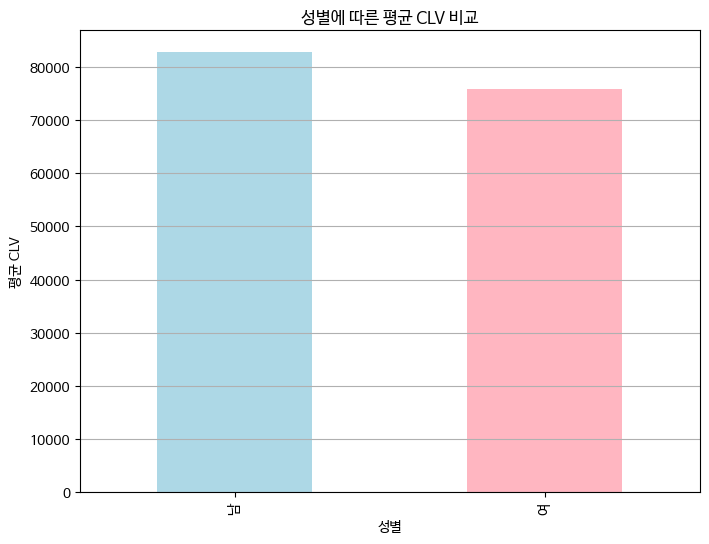

In [69]:
# Onlinesales와 Customer 데이터 결합
merged_data = pd.merge(filtered_sales, customer, on='고객ID')

# 같은 날, 동일한 고객이 동일 제품군을 구매한 경우를 1회 구매로 간주
unique_purchases = merged_data.drop_duplicates(subset=['고객ID', '거래날짜'])

# 고객별 총 수익 계산
customer_total_revenue = merged_data.groupby('고객ID')['매출'].sum()

# 고객별 총 구매 횟수 계산
customer_purchase_count = unique_purchases.groupby('고객ID')['거래ID'].count()

# 고객별 평균 구매 가치 계산
customer_avg_purchase_value = customer_total_revenue / customer_purchase_count

# 고객 평균 유지 기간 계산 (가입 기간을 활용)
customer_avg_lifespan = customer.set_index('고객ID')['가입기간']

# 고객 생애 가치 (CLTV) 계산
customer_clv = customer_avg_purchase_value * customer_purchase_count * customer_avg_lifespan

# 성별로 그룹화하여 평균 CLV 계산
gender_clv = pd.DataFrame({
    'CLV': customer_clv,
    '성별': customer.set_index('고객ID')['성별']
}).groupby('성별')['CLV'].mean()

# 결과 출력
print("성별에 따른 평균 CLV:")
print(gender_clv)

# 성별에 따른 평균 CLV 시각화
plt.figure(figsize=(8, 6))
gender_clv.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('성별에 따른 평균 CLV 비교')
plt.xlabel('성별')
plt.ylabel('평균 CLV')
plt.grid(axis='y')

# 차트 표시
plt.show()

💡
- 여자의 비율이 더 높지만 남자의 CLV가 더 높게 나왔다. 이는 남자 고객이 여자 고객보다 비싼 제품을 구매하는 경향이 있어보인다.
- 요인을 살펴보고 마케팅 전략을 세워보자.

검증 1-2. 남여 평균 금액 비교

성별에 따른 제품 카테고리별 평균 구매 금액:
제품카테고리  Accessories    Android    Apparel  Backpacks       Bags   Bottles  \
성별                                                                          
남          7.790769  16.070588  19.891653  82.154186  28.173605  3.555106   
여          8.478531  15.794231  19.727780  78.076087  30.921273  3.373506   

제품카테고리  Drinkware       Fun  Gift Cards     Google   Headgear  Housewares  \
성별                                                                          
남       10.946802  7.005574   80.035000  16.384762  15.539737    2.201837   
여       10.562631  6.582525  121.893782  16.487143  16.063845    1.965753   

제품카테고리  Lifestyle  More Bags        Nest  Nest-Canada    Nest-USA  \
성별                                                                  
남        3.841902  20.154286  149.721669   159.685500  124.365980   
여        3.873510  19.611875  147.058923   155.755584  124.310638   

제품카테고리  Notebooks & Journals    Office      Waze  
성별                          

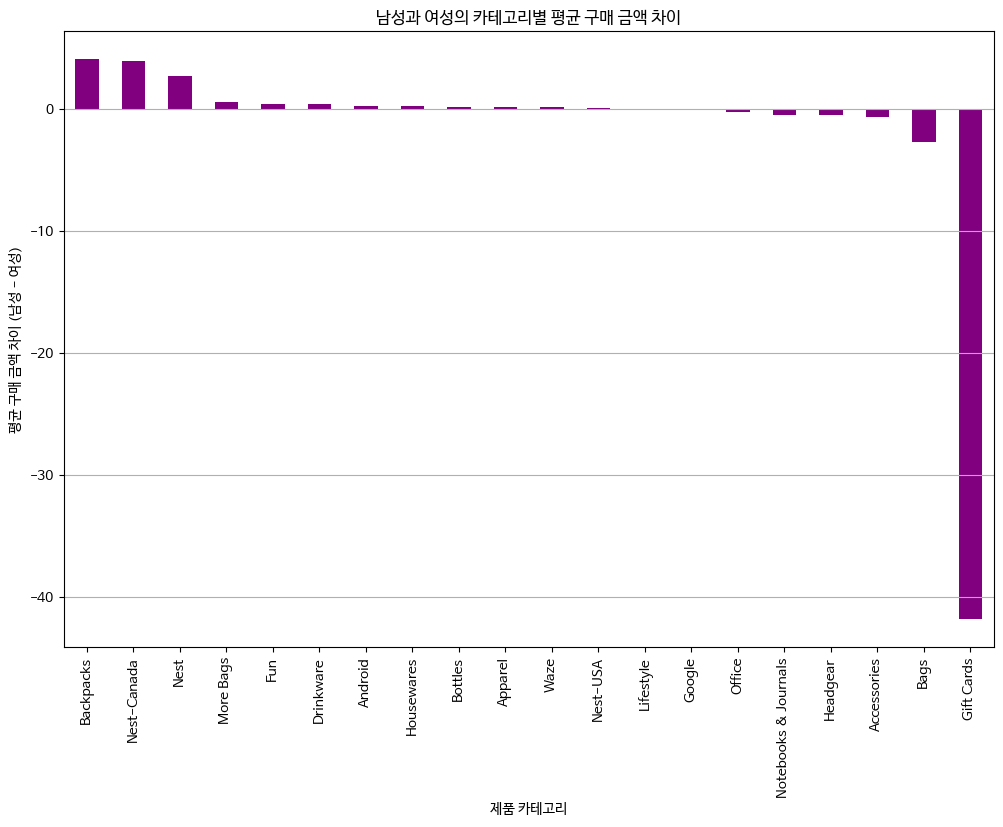

In [74]:
# 성별과 제품 카테고리별로 그룹화하여 평균 구매 금액 계산
gender_category_avg_price = merged_data.groupby(['성별', '제품카테고리'])['평균금액'].mean().unstack()

# 결과 출력
print("성별에 따른 제품 카테고리별 평균 구매 금액:")
print(gender_category_avg_price)

# 남성과 여성의 카테고리별 평균 구매 금액 비교
gender_diff = gender_category_avg_price.loc['남'] - gender_category_avg_price.loc['여']

# 결과 출력
print("\n남성과 여성의 카테고리별 평균 구매 금액 차이 (남성 - 여성):")
print(gender_diff.sort_values(ascending=False))

# 시각화
plt.figure(figsize=(12, 8))
gender_diff.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('남성과 여성의 카테고리별 평균 구매 금액 차이')
plt.xlabel('제품 카테고리')
plt.ylabel('평균 구매 금액 차이 (남성 - 여성)')
plt.grid(axis='y')

# 차트 표시
plt.show()

💡
- 남성 타겟팅: 남성들이 상대적으로 높은 구매 금액을 보이는 카테고리(예: Backpacks, Nest-Canada, Nest)에 대한 마케팅을 강화할 수 있다. 특히, 이 제품군의 고급화나 추가 서비스 제공이 남성 고객의 CLV를 더욱 높이는 전략이 될 수 있다.
- 여성 타겟팅: 반대로, 여성들이 더 높은 구매 금액을 보이는 카테고리(예: Bags, Gift Cards)에 집중한 마케팅을 통해 여성 고객의 구매를 유도할 수 있다. 기프트 카드 프로모션이나 가방 카테고리의 제품 다변화를 고려할 수 있다.

# 결론
- 쿠폰 마케팅 전략 재검토: 개인화된 제품의 쿠폰을 발송하여 활용도를 높여야 함
- 제품군 다양성 촉진: 서로 다른 제품군의 조합으로 번들 프로모션을 제공하여 고객이 더 많은 카테고리의 제품을 구매하도록 유도를 통한 구매 빈도 증가
- 고가 제품군에 대한 프리미엄 마케팅: 프리미엄 서비스 제공 및 업그레이드 할인 프로그램 도입을 통한 고객 경험 개선
- 지역별 맞춤형 마케팅: CLV가 높은 Chicago와 Washington DC 지역에 VIP 프로그램을 도입, CLV가 상대적으로 낮은 California와 New Jersey 지역에는 자주 구매하는 제품군에 대한 크로스셀링(cross-selling) 전략을 통해 고객당 매출을 높임
- 성별 타겟팅: 남성 고객을 위한 고가 제품군 마케팅 강화, 여성 고객을 위한 저가 제품군 및 선호 카테고리 프로모션을 진행하여 제품군 다변화를 추진.
